## Breve explicación de la elección del dataset: características, número de atributos y  variables, área al que pertenecen los datos. 

Realizado por Kevin Steban Rodriguez y Katalina Morales Dueñas

13 de Octubre del 2022

La base de datos a utilizar será acerca de los pagos por defecto de los clientes en Taiwán de su tarjeta de crédito donde se busca ver su probabilidad de incumplimiento e identificar clientes creíbles y no creíbles, todo esto bajo el panorama de la crisis de creditos de Taiwan del 2005. “incumplimiento de los clientes de tarjetas de crédito” o su nombre en inglés: “default of credit card clients Data Set” cuenta con 24 atributos, 30,000 instancias y pertenece al área de negocios.

Se encuentra un histórico de registros desde abril hasta septiembre del 2005. Y solamente se concluyó tomar el mes de septiembre, por ende, se puede decir que esta base de datos filtrada tiene 10 variables categóricas y 14 numéricas.

La base cuenta con datos faltantes y malas digitaciones. Con el fin de un analisis mas llevadero, se usa el esquema de "Datos disponibles" removiendo estos mismos.

### Variables cualitativas: 

- SEX: Género (1 = masculino; 2 = femenino).
- EDUCATION: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
- MARRIAGE: Estado civil (1 = casado; 2 = soltero; 3 = otros).
- PAY_0-PAY_6: Pago mensual de septiembre-abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

**Inconsistencias** 

 -2 corresponde a que no hay crédito para pagar; y
0 corresponde a un pago realizado a tiempo pero no el monto total para liquidar el saldo. (Otra forma de pensar en esto es que se cumple el pago mínimo).
-2: Sin consumo; -1: Pagado en su totalidad; 0: El uso de crédito revolvente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más. 

- DEFAULT PAYMENT NEXT MONTH: 1 hay un incumplimiento de pago para octubre de 2005. 0 quiere decir que no está incumpliendo.


### Variables cuantitativas:

- AGE: Edad (años).
- LIMIT_BAL: Monto del crédito otorgado (Nuevo dólar taiwanés): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
- BILL_AMT1-BILL_AMT6: Importe del estado de cuenta (Nuevo dólar taiwanés). Monto del estado de cuenta en septiembre-abril de 2005.

**Inconsistencias**

Por lo general, es posible que un cliente de tarjeta de crédito pague en exceso su factura y tenga temporalmente un saldo negativo. Por ejemplo, supongamos que mi factura de este mes es de 100 pero pago 250. Suponiendo que no tengo otras compras recientes, mi saldo será de -150.

En cuanto a por qué un cliente podría hacer esto, tal vez su pago automático esté configurado para pagar la misma cantidad todos los meses, independientemente del saldo, tal vez se olvidó si pagó su factura un mes y accidentalmente pagó dos veces, o tal vez simplemente le gusta pagar algo compras futuras esperadas por adelantado. Es posible que este tipo de comportamiento de pago no siempre parezca racional, pero no es poco común.

- PAY_AMT1-PAY_AMT6: Monto del pago anterior (Nuevo dólar taiwanés). Monto pagado en septiembre-abril de 2005


## Escenario mineria de datos

El fin de la base es el poder seleccionar individuos para saber si es viable entregarles entergarles una tarjeta de credito con un "cupo" alto. Para ello, se desea entrenar a la IA es un ambiente supervisado para obetenr los resultados mas optimos. Los creadores originales de la base recomendaban redes neuronales para la realización de este fin, pero una tarea de Clasificación sencilla tambien es viable dentro de este contexto.

## Importar datos y librerias

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install xlrd==1.1.0

  Using cached xlrd-1.1.0-py2.py3-none-any.whl (108 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [3]:
!pip install xlrd==1.2.0

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
pip install --upgrade xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xlrd>=1.2.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython.core.display import HTML

In [ ]:
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [7]:
df = pd.read_excel("tarj_credito.xls", 
                   dtype={
                     'SEX': str, 
                     'PAY_0': str,
                     'PAY_2': str,
                     'PAY_3': str,
                     'PAY_4': str,
                     'PAY_5': str,
                     'PAY_6': str,
                     'default payment next month': str
                 })

In [8]:
df = df.drop(['ID'], axis = 1)

In [9]:
df=df.query('EDUCATION != [0,5,6] & MARRIAGE != [0] & BILL_AMT1 >= 0')

In [10]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


Dimensión de los datos

In [11]:
print('Incumplimientos de pago en tarjetas de crédito')
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

Incumplimientos de pago en tarjetas de crédito
Filas:  29013
Columnas:  24


Atributo y tipo de atributo

In [12]:
df['EDUCATION'] = df['EDUCATION'].astype('object')
df['MARRIAGE'] = df['MARRIAGE'].astype('object')

In [13]:
df.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

## Análisis de datos faltantes

In [14]:
for col in df.columns:
    num_missing = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

LIMIT_BAL - 0.0% - 0
SEX - 0.0% - 0
EDUCATION - 0.0% - 0
MARRIAGE - 0.0% - 0
AGE - 0.0% - 0
PAY_0 - 0.0% - 0
PAY_2 - 0.0% - 0
PAY_3 - 0.0% - 0
PAY_4 - 0.0% - 0
PAY_5 - 0.0% - 0
PAY_6 - 0.0% - 0
BILL_AMT1 - 0.0% - 0
BILL_AMT2 - 0.0% - 0
BILL_AMT3 - 0.0% - 0
BILL_AMT4 - 0.0% - 0
BILL_AMT5 - 0.0% - 0
BILL_AMT6 - 0.0% - 0
PAY_AMT1 - 0.0% - 0
PAY_AMT2 - 0.0% - 0
PAY_AMT3 - 0.0% - 0
PAY_AMT4 - 0.0% - 0
PAY_AMT5 - 0.0% - 0
PAY_AMT6 - 0.0% - 0
default payment next month - 0.0% - 0


No hay presencia de datos faltantes en ninguna de las variables.

## Datos duplicados

In [15]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_dedupped = df.drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(29013, 24)
(28978, 24)


In [17]:
df_dedupped.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Consistencia de datos

Variables categóricas:

In [ ]:
df_dedupped.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [ ]:
df_dedupped['SEX'].value_counts()

2    17477
1    11501
Name: SEX, dtype: int64

In [ ]:
df_dedupped['EDUCATION'].value_counts()

2    13798
1    10275
3     4789
4      116
Name: EDUCATION, dtype: int64

In [ ]:
df_dedupped['MARRIAGE'].value_counts()

2    15486
1    13179
3      313
Name: MARRIAGE, dtype: int64

No aparece en el diccionario que significa el valor 0 ni -2. Esto fue aclarado en la sección de inconsistencias la cual se encuentra en la descripción inicial de la base.

In [ ]:
df_dedupped['PAY_0'].value_counts() 

0     14499
-1     5625
1      3264
2      2639
-2     2492
3       320
4        76
5        24
8        19
6        11
7         9
Name: PAY_0, dtype: int64

In [ ]:
df_dedupped['PAY_2'].value_counts()

0     15476
-1     5787
2      3903
-2     3304
3       325
4        97
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

In [ ]:
df_dedupped['PAY_3'].value_counts()

0     15478
-1     5651
2      3765
-2     3695
3       236
4        75
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

In [ ]:
df_dedupped['PAY_4'].value_counts()

0     16115
-1     5412
-2     3986
2      3116
3       179
4        68
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

In [ ]:
df_dedupped['PAY_5'].value_counts()

0     16556
-1     5299
-2     4185
2      2599
3       176
4        83
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

In [ ]:
df_dedupped['PAY_6'].value_counts()

0     15924
-1     5490
-2     4515
2      2739
3       182
4        48
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

In [ ]:
df_dedupped['default payment next month'].value_counts()

0    22488
1     6490
Name: default payment next month, dtype: int64

Variables cuantitativas:

In [ ]:
df_dedupped['LIMIT_BAL'].describe()

count      28978.000000
mean      166466.411761
std       129809.238372
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
df_dedupped['AGE'].describe()

count    28978.000000
mean        35.443543
std          9.216877
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [ ]:
#Dinero que deben desde abril hasta septiembre del 2005:

In [ ]:
df_dedupped['BILL_AMT1'].describe()

count     28978.000000
mean      52076.273621
std       73740.369257
min           0.000000
25%        4236.500000
50%       23741.500000
75%       68250.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

De acuerdo a la variable BILL_AMT se presentan valores negativos en los montos que deben esto está aclarado en la sección de inconsistencias en la parte inicial en la descripción de la base.

In [ ]:
df_dedupped['BILL_AMT2'].describe() 

count     28978.000000
mean      49853.684105
std       71311.645079
min      -69777.000000
25%        3469.000000
50%       22300.500000
75%       65067.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

In [ ]:
df_dedupped['BILL_AMT3'].describe() #Mas pasa el tiempo más deben

count    2.897800e+04
mean     4.760700e+04
std      6.946401e+04
min     -1.572640e+05
25%      3.125250e+03
50%      2.071800e+04
75%      6.110925e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

In [ ]:
df_dedupped['BILL_AMT4'].describe()

count     28978.000000
mean      43851.809062
std       64547.161262
min     -170000.000000
25%        2589.000000
50%       19407.500000
75%       55627.250000
max      891586.000000
Name: BILL_AMT4, dtype: float64

In [ ]:
df_dedupped['BILL_AMT5'].describe()

count     28978.000000
mean      40894.253227
std       61022.037811
min      -81334.000000
25%        2026.000000
50%       18524.500000
75%       50776.250000
max      927171.000000
Name: BILL_AMT5, dtype: float64

In [ ]:
df_dedupped['BILL_AMT6'].describe()                                 

count     28978.000000
mean      39493.847160
std       59842.995365
min     -339603.000000
25%        1450.000000
50%       17670.000000
75%       49735.750000
max      961664.000000
Name: BILL_AMT6, dtype: float64

In [ ]:
#Dinero que ya se pagó

In [ ]:
df_dedupped[['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,28978.000000,2.897800e+04,28978.000000,28978.000000,28978.000000,28978.000000
mean,5592.748326,5.857845e+03,5210.288460,4837.219097,4805.112637,5213.798364
std,16105.550809,2.288608e+04,17611.263646,15694.812867,15170.625750,17767.782330
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.785000e+02,419.000000,316.000000,300.000000,184.250000
50%,2135.000000,2.022500e+03,1842.000000,1500.000000,1526.500000,1500.000000
75%,5009.000000,5.000000e+03,4531.750000,4056.000000,4095.000000,4006.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


## Hallazgos generales del proceso de calidad y limpieza de datos

1. De acuerdo al análisis de datos faltantes realizado se puede decir que para nuestra base de datos no se encontraron espacios sin información, todas las casillas están llenas.
2. Las dimensiones de la base de datos relacionada al incumplimientos de pago en tarjetas de crédito es la siguiente: Filas:  29.013 y Columnas:  24. Luego de realizar el proceso de datos duplicados las filas se redujeron a 28.978 filas con 24 columnas.
3. Finalmente frente a la consistencia de los datos se determinó que para el pago mensual de septiembre-abril de 2005 (PAY). La escala de medición del estado de amortización presenta valores de 0 y -2 las cuales no aparecian en el diccionario original. Indagando por internet se encontró que -2 corresponde a que no hay crédito para pagar; y 0 corresponde a un pago realizado a tiempo pero no el monto total para liquidar el saldo. (Otra forma de pensar en esto es que se cumple el pago mínimo). Es decir, -2: Sin consumo; -1: Pagado en su totalidad; 0: El uso de crédito revolvente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más. Asi mismo, de acuerdo a la variable BILL_AMT se presentaron valores negativos en los montos que los clientes deben. Eso no se encontraba descrito en el diccionario original de la base de datos. Indagando por internet se encontró que, por lo general, es posible que un cliente de tarjeta de crédito pague en exceso su factura y tenga temporalmente un saldo negativo. Por ejemplo, supongamos que mi factura de este mes es de 100 pero pago 250. Suponiendo que no tengo otras compras recientes, mi saldo será de -150.En cuanto a por qué un cliente podría hacer esto, tal vez su pago automático esté configurado para pagar la misma cantidad todos los meses, independientemente del saldo, tal vez se olvidó si pagó su factura un mes y accidentalmente pagó dos veces, o tal vez simplemente le gusta pagar algo compras futuras esperadas por adelantado. Es posible que este tipo de comportamiento de pago no siempre parezca racional, pero no es poco común.




## Selección variables explicativas

- Selección de la variable a clasificar: Dummy (1 y 0) DEFAULT PAYMENT NEXT MONTH: 1 hay un incumplimiento de pago para octubre de 2005 0 quiere decir que no está incumpliendo.

- Selección de las variables independientes: ¿Qué podría explicar o que nos ayudaría a clasificar que un individuo sea incumplido o no con el pago?

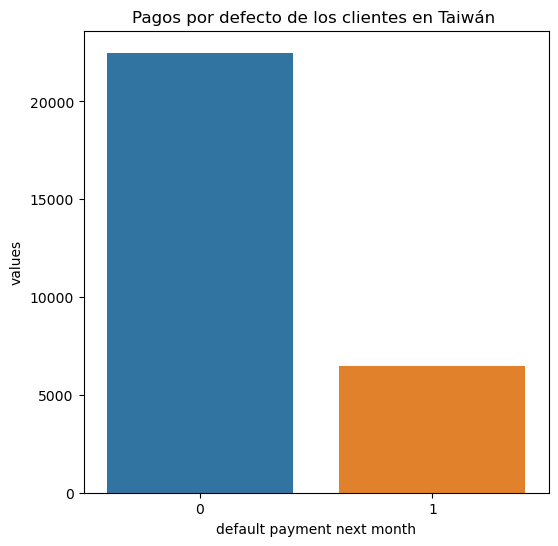

In [ ]:
temp = df_dedupped['default payment next month'].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Pagos por defecto de los clientes en Taiwán ')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y= "values", data=df)
locs, labels = plt.xticks()
plt.show()

Si el valor es 1 hay un incumplimiento de pago para el siguiente mes. (Octubre 2005) En su mayoria son más aquellos que cumplen que los que incumplen.

Variables cuantitativas:

In [ ]:
df1 = df.iloc[:, [0,4,11,12,13,14,15,16,17,18,19,20,21,22]] ; df1

IndexError: positional indexers are out-of-bounds

In [ ]:
corr_df = df1.corr()
print("Matriz de correlación:")
print(corr_df, "\n")

Matriz de correlación:
           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.142188   0.294221   0.286080   0.290139   0.301721   
AGE         0.142188  1.000000   0.057293   0.054636   0.053834   0.052069   
BILL_AMT1   0.294221  0.057293   1.000000   0.952805   0.894352   0.862773   
BILL_AMT2   0.286080  0.054636   0.952805   1.000000   0.928546   0.894537   
BILL_AMT3   0.290139  0.053834   0.894352   0.928546   1.000000   0.925894   
BILL_AMT4   0.301721  0.052069   0.862773   0.894537   0.925894   1.000000   
BILL_AMT5   0.303291  0.050368   0.833102   0.862647   0.886434   0.940979   
BILL_AMT6   0.297412  0.048851   0.806297   0.834842   0.856597   0.902698   
PAY_AMT1    0.204436  0.026229   0.153187   0.281958   0.243899   0.237988   
PAY_AMT2    0.179656  0.021987   0.103528   0.102947   0.317221   0.208741   
PAY_AMT3    0.212445  0.029746   0.158843   0.152703   0.132312   0.299704   
PAY_AMT4    0.205991  0.020446   0.160267

Correlación de características

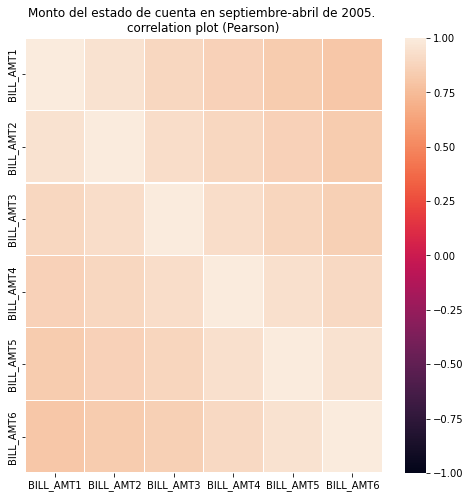

In [ ]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Monto del estado de cuenta en septiembre-abril de 2005. \ncorrelation plot (Pearson)')
corr = df_dedupped[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

La correlación está disminuyendo con la distancia entre los meses. Las correlaciones más bajas son entre septiembre y abril.

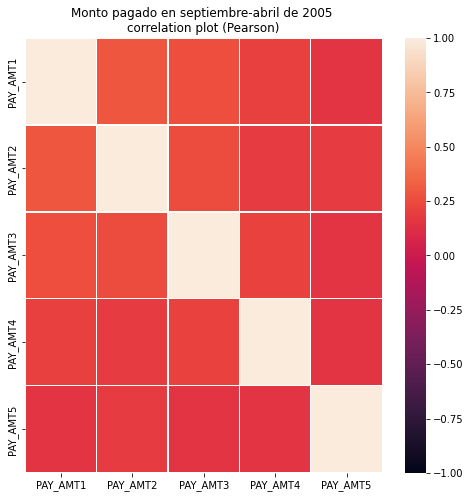

In [ ]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Monto pagado en septiembre-abril de 2005 \ncorrelation plot (Pearson)')
corr = df_dedupped[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

No existen correlaciones significativas entre los montos de los pagos anteriores de abril a septiembre de 2005.

Variables cualitativas:

In [ ]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df_dedupped, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

Estado civil vs la edad de acuerdo al sexo

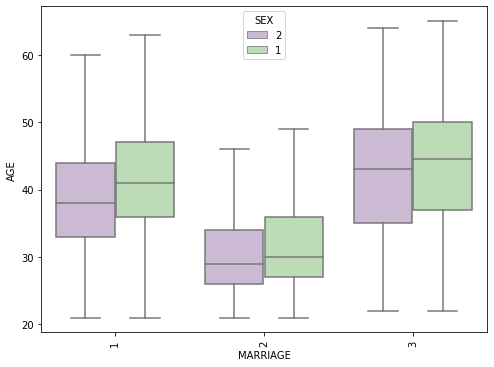

In [ ]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Nivel educativo vs la edad de acuerdo al estado civil

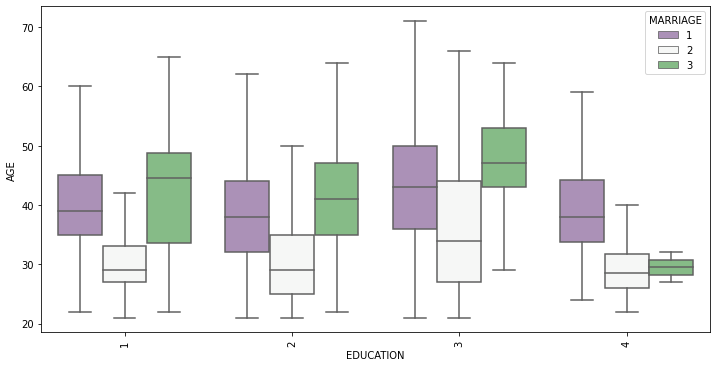

In [ ]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

Estado civil vs el monto otorgado de acuerdo al nivel educativo

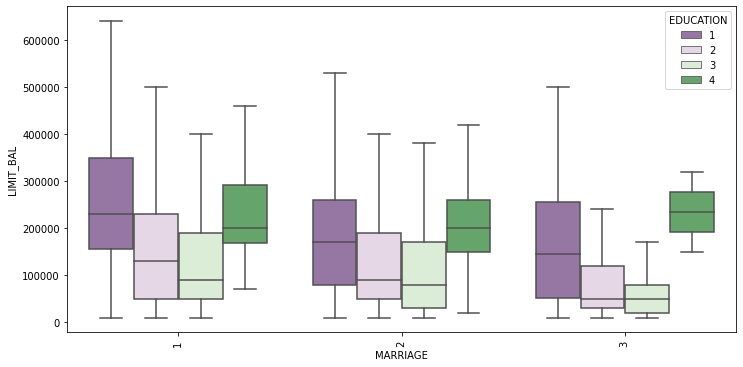

In [ ]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

Credito vs Sexo

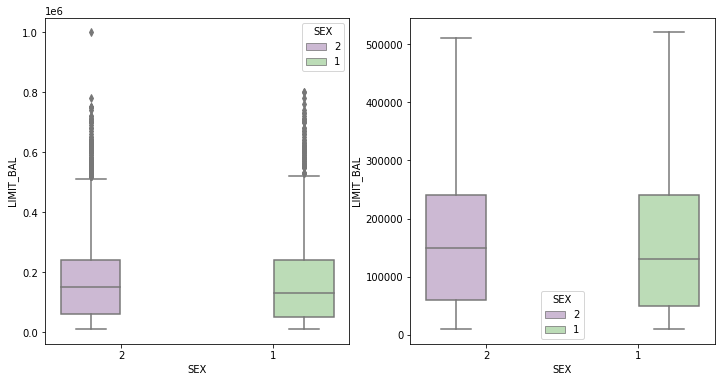

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df_dedupped, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df_dedupped, palette="PRGn",showfliers=False)
plt.show();

Con la variable respuesta

Crédito otorgado:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['SEX'], columns = df_dedupped['default payment next month'])

In [ ]:
OBS

default payment next month,0,1
SEX,,
1,8686,2815
2,13802,3675


In [ ]:
from scipy.stats import chi2_contingency 

H0: Establece que no existe relación entre las variables. 

Ha: Existe una relación significativa entre los dos.

In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 6.2086433674366054e-12
Dependent(reject H0)


Existe una relación significativa entre el sexo y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

In [ ]:
OBS = pd.crosstab(index = df_dedupped['EDUCATION'], columns = df_dedupped['default payment next month']); OBS

In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 1.9684030683130793e-25
Dependent(reject H0)


Existe una relación significativa entre el nivel educativo y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

In [ ]:
OBS = pd.crosstab(index = df_dedupped['MARRIAGE'], columns = df_dedupped['default payment next month']); OBS

default payment next month,0,1
MARRIAGE,,
1,10050,3129
2,12208,3278
3,230,83


In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 2.698996910087648e-07
Dependent(reject H0)


Existe una relación significativa entre el estado civil y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

Pago mensual de septiembre-abril de 2005

Pago abril:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_0'], columns = df_dedupped['default payment next month']); OBS

default payment next month,0,1
PAY_0,,
-1,4673,952
-2,2163,329
0,12631,1868
1,2092,1172
2,803,1836
3,76,244
4,24,52
5,11,13
6,5,6


In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Mayo:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_2'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Junio:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_3'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Julio:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_4'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Agosto:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_5'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Septiembre:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_6'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Existe una relación significativa entre los pagos mensuales del monto y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

Variables cuantitativas:

In [ ]:
def boxplot_variation(feature1, feature2, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2,
                data=df_dedupped, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

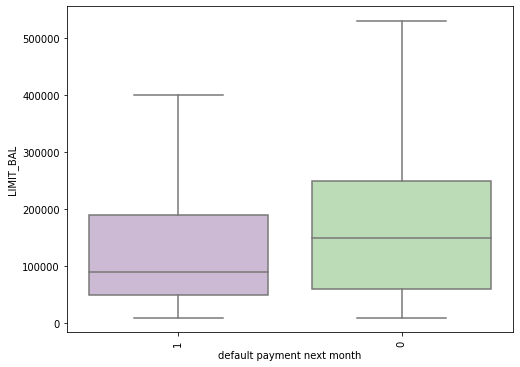

In [ ]:
boxplot_variation('default payment next month', 'LIMIT_BAL',8)

Aquellos individuos registrados con montos asignados "Bajos" son quienes cumplen con el pago del siguiente mes de octubre mientrás que, aquellos que tienen montos elevados no han cumplido con sus pagos al ser tan altos.

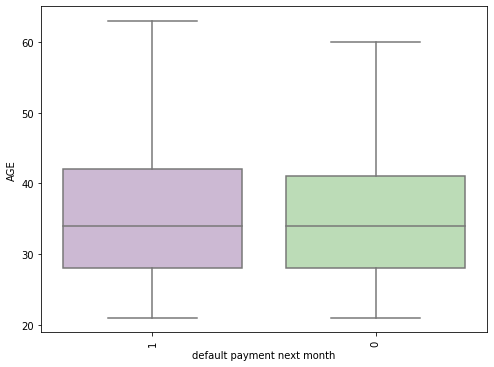

In [ ]:
boxplot_variation('default payment next month', 'AGE',8)

No parece existir una diferencia del incumplimiento por la edad del individuo.

Monto del estado de cuenta:

Text(0.5, 1.0, 'Septiembre')

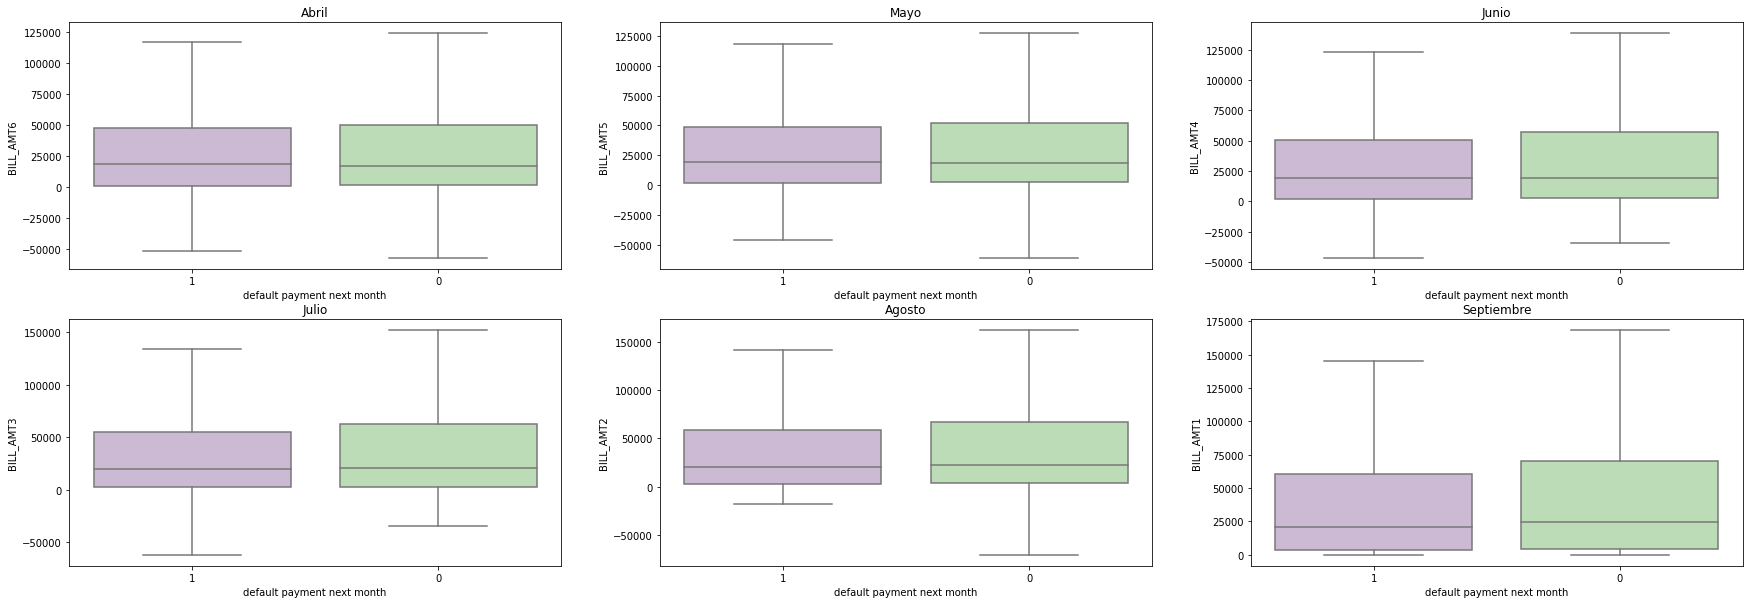

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT6", ax=axes[0,0], showfliers=False, palette="PRGn")
axes[0,0].set_title("Abril")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT5",  ax=axes[0,1], showfliers=False, palette="PRGn")
axes[0,1].set_title("Mayo")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT4",  ax=axes[0,2], showfliers=False, palette="PRGn")
axes[0,2].set_title("Junio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT3",  ax=axes[1,0], showfliers=False, palette="PRGn")
axes[1,0].set_title("Julio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT2",  ax=axes[1,1], showfliers=False, palette="PRGn")
axes[1,1].set_title("Agosto")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT1",  ax=axes[1,2], showfliers=False, palette="PRGn")
axes[1,2].set_title("Septiembre")

Se puede evidenciar como en los primeros dos meses no se ven diferencias entre ambos boxplot (Cumplimiento e incumplimiento) lo que quiere decir que el monto del estado de cuenta no presenta cambios significativos en que la persona tenga o no un incumplimiento. Sin embargo a partir del mes de junio se puede notar que aquellos que no incumplen tienen montos del estado de cuenta más grandes a comparacion de quienes si incumplen.
A medida que pasa el tiempo se evidencia como el monto del estado de cuenta disminuyó en cuanto a su valor.

Monto del pago anterior:

Text(0.5, 1.0, 'Septiembre')

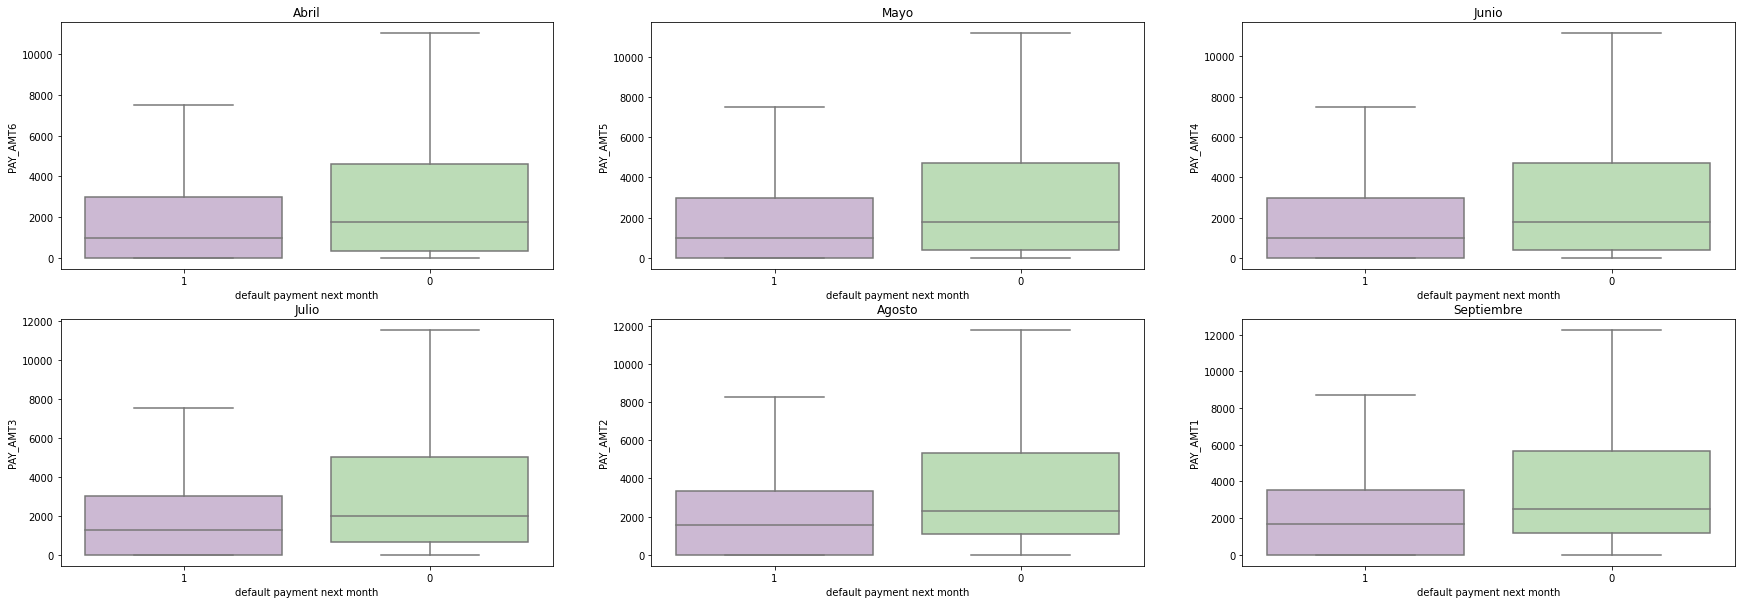

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT6", ax=axes[0,0], showfliers=False, palette="PRGn")
axes[0,0].set_title("Abril")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT5",  ax=axes[0,1], showfliers=False, palette="PRGn")
axes[0,1].set_title("Mayo")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT4",  ax=axes[0,2], showfliers=False, palette="PRGn")
axes[0,2].set_title("Junio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT3",  ax=axes[1,0], showfliers=False, palette="PRGn")
axes[1,0].set_title("Julio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT2",  ax=axes[1,1], showfliers=False, palette="PRGn")
axes[1,1].set_title("Agosto")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT1",  ax=axes[1,2], showfliers=False, palette="PRGn")
axes[1,2].set_title("Septiembre")

En cuanto al monto pagado en septiembre-abril de 2005 durante estos seis meses si se evidencia un cambio grande entre aquellos que si incumplen y los que no, lo cual la hace importante para ser seleccionada en el modelo. Aquellos que incumplen en sus pagos tienen un menor monto pagado a comparacion de quienes si cumplen.

Pruebas estadisticas finales:

Las hipótesis contrastadas por el t-test de muestras independientes son:

H0 : no hay diferencias entre las medias:  μx=μy 

Ha : sí hay diferencias entre las medias:  μx≠μy

Monto otorgado:

In [ ]:
#Definir 
from scipy.stats import ttest_ind
group1 = df_dedupped[df_dedupped['default payment next month']=="1"]
group2 = df_dedupped[df_dedupped['default payment next month']=="0"] 

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['LIMIT_BAL'])

Ttest_indResult(statistic=-27.033063864563864, pvalue=5.683894607893437e-159)

Dado que el valor p es inferior a 0.05, rechazamos la hipótesis nula de la prueba t y concluimos que hay suficiente evidencia para decir que las personas que incumplen tienen en promedio un monto otorgado diferente a los que si cumplen.

Edad:

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['AGE'])

Ttest_indResult(statistic=168.4091688366584, pvalue=0.0)

Aunque en el Boxplot se evidencian similitudes segun la prueba T realizada se dice que si hay diferencias significativas entre si una persona incumple o no con respecto a su edad.

Monto del estado de cuenta:

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT6']) 

Ttest_indResult(statistic=83.48411572569468, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT5']) 

Ttest_indResult(statistic=81.49556384451544, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT4']) 

Ttest_indResult(statistic=76.28912118883076, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT3']) 

Ttest_indResult(statistic=69.76046831706618, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT2']) 

Ttest_indResult(statistic=66.9704169967604, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT1']) 

Ttest_indResult(statistic=63.52805514009813, pvalue=0.0)

De acuerdo a las prueba T se puede decir que el promedio del monto del estado de cuenta es estadisticamente diferente en las personas que incumplen a comparación de aquellas que cumplen. Quienes cumplen con su pago el monto del estado de cuenta es menor.


En conclusión, todas las variables resultan ser determinantes en el modelo para poder clasificar si una persona incumplirá o no en su pago. La única que resulta no ser tan importante como las demás es la variable "Edad" 

## Algoritmo de clasificación 

Para las métricas se hará uso de la precisión y el Log Loss/Binary Crossentropy

Aplique el algoritmo realizando un modelo utilizando todo el dataset preprocesado, prediga todos
los valores del conjunto y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo

In [18]:
y = df_dedupped.loc[:,["default payment next month"]];y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29994,1
29995,0
29996,0
29997,1


In [19]:
df_dummy = pd.get_dummies(df_dedupped[["SEX", "EDUCATION","MARRIAGE", 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]); df_dummy

C:\Users\kevin\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,...,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
29995,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
 #Cualitativas
df2 = df_dummy.drop(['SEX_1', 'EDUCATION_1', 'MARRIAGE_1','PAY_0_-1', 'PAY_2_-1','PAY_3_-1','PAY_4_-1','PAY_5_-1','PAY_6_-1' ], axis=1); df2

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
29995,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29997,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
df2 = df2.reset_index()

In [22]:
df1 = df_dedupped.loc[:,['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]; df1 #Cuantitativas

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [23]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_x = df1.astype(float)
scaler.fit(X_x)
df1_scaled = scaler.transform(X_x)

In [24]:
df11 = pd.DataFrame(df1_scaled)
df11.columns =["LIMIT_BAL",	"AGE",	"BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",
               "BILL_AMT5",	"BILL_AMT6",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6"] 

In [25]:
df11

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,-0.295855,-0.308210,-0.316743,-0.293446
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,-0.239072,-0.244494,-0.316743,-0.180881
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,-0.239072,-0.244494,-0.250825,-0.012033
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,-0.227715,-0.238122,-0.246277,-0.237164
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,0.271973,0.265237,-0.271326,-0.255230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,-0.295855,0.137805,-0.316743,-0.068316
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,-0.011770,-0.114066,0.012847,-0.237164
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,0.215077,-0.299991,-0.316743,-0.293446
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,0.953367,-0.040601,-0.184907,-0.118970


In [26]:
X = pd.concat([df11,df2], axis = 1); X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,...,0,1,0,0,0,0,0,0,0,0
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,...,0,0,0,1,0,0,0,0,0,0
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,...,0,0,1,0,0,0,0,0,0,0
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,...,0,0,1,0,0,0,0,0,0,0
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,...,0,0,0,1,0,0,0,0,0,0
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0,0,1,0,0,0,0,0,0,0
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,...,0,0,1,0,0,0,0,0,0,0
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,...,0,0,1,0,0,0,0,0,0,0


In [27]:
X = X.drop(['index'], axis=1); X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,...,0,1,0,0,0,0,0,0,0,0
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,...,0,0,0,1,0,0,0,0,0,0
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,...,0,0,1,0,0,0,0,0,0,0
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,...,0,0,1,0,0,0,0,0,0,0
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,...,0,0,0,1,0,0,0,0,0,0
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0,0,1,0,0,0,0,0,0,0
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,...,0,0,1,0,0,0,0,0,0,0
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,...,0,0,1,0,0,0,0,0,0,0


In [28]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
     

In [29]:
#Modelo logistico simple
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer, roc_curve, auc

**La regresión de Lasso** (o "regularización L1")

**La regresión de Ridge** (o "regularización L2")

- **La regresión de Lasso** encoge los coeficientes hasta cero, eliminándolos así del modelo

- **La regresión de Ridge** encoge los coeficientes hacia cero, pero rara vez llegan a cero

Se eligió un modelo logistico realizando algoritmos de regularización debido a la cantidad tan grande de parámetros.

Se hará uso de las métricas FBeta y ROC-AUC

Con el valor de C = 0.1 utilizando Lasso

In [ ]:
# try C = 0.1 with L1 penalty
logreg = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
#FBeta alcanza su mejor valor en 1 y la peor puntuación en 0. 
y_pred = logreg.predict(X)
b1 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b1 #Quiero darle mas importancia a la precisión con 0.5

0.46943319838056674


In [ ]:
# ROC - AUC Para una clasificación desequilibrada, la sensibilidad puede ser más interesante que la especificidad.
a1 = print(metrics.roc_auc_score(y, y_pred)); a1

0.6548467760103795


Con el valor de C = 0.1 utilizando Ridge

In [ ]:
# try C = 0.1 with L2 penalty
logreg = LogisticRegression(C = 0.1, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
#FBeta 
y_pred = logreg.predict(X)
b2 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b2

0.474060642691649


In [ ]:
# ROC - AUC 
a2 = print(metrics.roc_auc_score(y, y_pred)); a2

0.6571771474490212


Cambiando el valor de C = 9 utilizando un Lasso

In [ ]:
# try C = 9 with L1 penalty
logreg = LogisticRegression(C = 9 , penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9, penalty='l1', solver='liblinear')

In [ ]:
#FBeta 
y_pred = logreg.predict(X)
b3 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b3

0.47755798774977404


In [ ]:
# ROC - AUC 
a3 = print(metrics.roc_auc_score(y, y_pred)); a3

0.6589475489478656


Cambiando el valor de C = 9 utilizando un Ridge

In [ ]:
# try C = 9 with L2 penalty
logreg = LogisticRegression(C = 9, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9, solver='liblinear')

In [ ]:
#FBeta 
y_pred = logreg.predict(X)
b4 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b4

0.4780076320546295


In [ ]:
# ROC - AUC 
a4 = print(metrics.roc_auc_score(y, y_pred)); a4

0.6591683343939915


Cambiando el valor a C = 1 utilizando un Lasso

In [ ]:
# try C = 1 with L1 penalty
logreg = LogisticRegression(C = 1 , penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
#FBeta 
y_pred = logreg.predict(X)
b5 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b5

0.4760277414815559


In [ ]:
# ROC - AUC 
a5 = print(metrics.roc_auc_score(y, y_pred)); a5

0.6581771329232122


Cambiando el valor a C = 1 utilizando un Rigde

In [ ]:
# try C = 1 with L2 penalty
logreg = LogisticRegression(C = 1, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, solver='liblinear')

In [ ]:
#FBeta 
y_pred = logreg.predict(X)
b6 = print(metrics.fbeta_score(y, y_pred, beta=1, pos_label= "1")); b6

0.47639140044203326


In [ ]:
# ROC - AUC 
a6 = print(metrics.roc_auc_score(y, y_pred)); a6

0.6583637895698113


- Aplique el algoritmo realizando un modelo utilizando una partición el dataset preprocesado (elija
entre alguno de los tipos de validación cruzada vistas en clase), prediga los valores utilizando el
conjunto de validación y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo

Partir datos de entrenamiento y testeo

Se recortará primero la base de datos el 90% entrenamiento y 10% validación. Es decir habrán 26.080 de entrenamiento y 2.898 para validación.

In [30]:
y = y.reset_index(drop = True)

In [31]:
y.columns

Index(['default payment next month'], dtype='object')

Entrenamiento y testeo 90/10

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26080, 78) (2898, 78) (26080, 1) (2898, 1)


Ridge

In [37]:
c_range = 10.**np.arange(-2, 2); c_range

array([ 0.01,  0.1 ,  1.  , 10.  ])

In [ ]:
ridge_pred_AUC_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  ridge_pred_AUC_80.append(metrics.roc_auc_score(y_test, y_pred))
  j=j+1

ridge_pred_beta_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  ridge_pred_beta_80.append(metrics.fbeta_score(y_test, y_pred, beta=1, pos_label= "1"))
  j=j+1

print(ridge_pred_beta_80,ridge_pred_AUC_80)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.458, 0.48648648648648657, 0.4821600771456124, 0.48315688161693937] [0.6484004165455779, 0.6627554974329168, 0.6605819529206626, 0.6611086893344957]


Lasso

In [ ]:
lasso_pred_AUC_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  lasso_pred_AUC_80.append(metrics.roc_auc_score(y_test, y_pred))
  j=j+1

lasso_pred_beta_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  lasso_pred_beta_80.append(metrics.fbeta_score(y_test, y_pred, beta=1, pos_label= "1"))
  j=j+1

print(lasso_pred_beta_80,lasso_pred_AUC_80)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.4373716632443532, 0.4796905222437137, 0.48169556840077066, 0.48315688161693937] [0.6386285479027415, 0.6593044657560787, 0.6603579385837449, 0.6611086893344957]


Resultados:

In [ ]:
tabla=np.array([ridge_pred_beta_80,
               ridge_pred_AUC_80,
               lasso_pred_beta_80,
               lasso_pred_AUC_80])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['FBeta ridge','AUC - ROC ridge','FBeta lasso','AUC - ROC lasso'])
frame

,FBeta ridge,AUC - ROC ridge,FBeta lasso,AUC - ROC lasso
0.01,0.458000,0.648400,0.437372,0.638629
0.10,0.486486,0.662755,0.479691,0.659304
1.00,0.482160,0.660582,0.481696,0.660358
10.00,0.483157,0.661109,0.483157,0.661109


Validación K-Folds

Ridge K = 5

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
y_train1 = y_train

In [ ]:
y_train1 = y_train1.replace({"0": 0, "1": 1})

In [ ]:
y_train1.dtypes

default payment next month    int64
dtype: object

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)
ridge_pred_beta_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring= "f1", cv=cv, n_jobs=-1)
  ridge_pred_beta_k5.append(np.mean(scores))
  j+=1

ridge_pred_auc_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  ridge_pred_auc_k5.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_beta_k5,ridge_pred_auc_k5)

[0.4357910993721609, 0.4702964408006201, 0.47614938395216394, 0.47581431726291] [0.766469481776139, 0.770300528613475, 0.7700919300902509, 0.7692239143504656]


Ridge K = 10

In [ ]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)
ridge_pred_beta_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring= "f1", cv=cv, n_jobs=-1)
  ridge_pred_beta_k10.append(np.mean(scores))
  j+=1

ridge_pred_auc_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  ridge_pred_auc_k10.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_beta_k10,ridge_pred_auc_k10)

[0.43979621199335545, 0.4699447423987483, 0.47525808651053697, 0.4756294936886169] [0.767008795687586, 0.7704121983339306, 0.7702490084368117, 0.7695983128264792]


Lasso K = 5

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)
lasso_pred_beta_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring= "f1", cv=cv, n_jobs=-1)
  lasso_pred_beta_k5.append(np.mean(scores))
  j+=1

lasso_pred_auc_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  lasso_pred_auc_k5.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_beta_k5,lasso_pred_auc_k5)

[0.41613502927565904, 0.46540089935751966, 0.47519460534723734, 0.47570048387576885] [0.7610101138834036, 0.769607751612097, 0.7701870604499529, 0.769109518333955]


Lasso K = 10

In [ ]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)
lasso_pred_beta_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring= "f1", cv=cv, n_jobs=-1)
  lasso_pred_beta_k10.append(np.mean(scores))
  j+=1

lasso_pred_auc_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  lasso_pred_auc_k10.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_beta_k10,lasso_pred_auc_k10)

[0.41920412574450683, 0.46426947994167583, 0.4750736386151325, 0.4752818889587324] [0.7619747397271811, 0.7696746093533041, 0.7703053605422872, 0.769432280093727]


Tabla Beta:

In [ ]:
tabla=np.array([ridge_pred_beta_k5,
               ridge_pred_beta_k10,
               lasso_pred_beta_k5,
               lasso_pred_beta_k10])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['ridge k5','ridge k10','lasso k5','lasso k10'])
frame

,ridge k5,ridge k10,lasso k5,lasso k10
0.01,0.435791,0.439796,0.416135,0.419204
0.10,0.470296,0.469945,0.465401,0.464269
1.00,0.476149,0.475258,0.475195,0.475074
10.00,0.475814,0.475629,0.475700,0.475282


Según la métrica Beta = 1, el mejor modelo a ajustar seria un Ridge con k = 5 y C = 1. 

Tabla AUC - ROC: 

In [ ]:
tabla=np.array([ridge_pred_auc_k5,
               ridge_pred_auc_k10,
               lasso_pred_auc_k5,
               lasso_pred_auc_k10])

frame=pd.DataFrame(tabla.T, index=c_range,columns=['ridge k5','ridge k10','lasso k5','lasso k10'])
frame

,ridge k5,ridge k10,lasso k5,lasso k10
0.01,0.766469,0.767009,0.761010,0.761973
0.10,0.770301,0.770412,0.769608,0.769678
1.00,0.770092,0.770249,0.770187,0.770306
10.00,0.769224,0.769598,0.769110,0.769429


De acuerdo a la métrica AUC - ROC lo mejor seria elegir un Lasso k10 con C = 1.

A continuación se van a realizar las predicciones utilizando el mejor modelo arrojado por cada métrica empleada (FBeta y AUC - ROC)

Validación de acuerdo a la métrica fBeta = 1

Ridge con k = 5 y C = 1. 

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)
logreg_1 = LogisticRegression(C= 1, penalty='l2',solver= 'liblinear',multi_class='auto')
scores_1 = cross_val_score(logreg_1, X_train, y_train1, scoring='f1', cv=cv, n_jobs=-1) #Beta
scores_2 = cross_val_score(logreg_1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1) #AUC - ROC

In [ ]:
print('Fbeta:', np.mean(scores_1))
print('AUC - ROC:', abs(np.mean(scores_2)))

Fbeta: 0.47614938395216394
AUC - ROC: 0.7700919300902509


In [ ]:
logreg_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, solver='liblinear')

In [ ]:
print(logreg_1.coef_)

[[-2.46735175e-01  2.92144913e-02 -2.02968570e-01  2.21913073e-01
   2.05661964e-01  4.08906007e-03  3.00721857e-02 -9.17011149e-02
  -2.00277404e-01 -2.27954502e-01 -2.15089347e-02 -1.59570765e-02
  -2.20625129e-02 -3.63576496e-02 -1.41271297e-01  2.87112571e-02
  -1.16867185e-02 -9.27790865e-01 -1.50461632e-01  1.93696446e-01
  -5.06696378e-01 -7.50525521e-01  3.46735638e-01  1.55299814e+00
   1.49555757e+00  1.27592895e+00  7.89817037e-01  1.04335100e-01
   6.48737981e-01  1.54230271e-01  1.46695924e-01  2.52822700e-01
  -2.98269272e-01  2.11080679e-01  1.73025432e-01 -4.27247725e-01
   7.65874709e-01  7.42654691e-01  4.74487180e-01 -3.84586820e-01
  -5.19584641e-02 -1.99477332e-02  6.27723967e-02  3.42769038e-01
   4.43929110e-01 -1.52618189e-01 -3.03560464e-01  1.06571324e+00
   1.56797692e-01 -8.62995014e-02  1.65730967e-01  3.97842967e-02
   4.65561067e-01  2.92669736e-01  3.52660268e-01  5.56053299e-01
  -6.00025419e-01 -1.36048863e-01  3.05804460e-01 -3.53798509e-01
   1.22787

In [ ]:
y_pred_val = logreg_1.predict(X_test)

In [ ]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1"))

2232
666


In [ ]:
pred = pd.DataFrame(y_pred_val)

In [ ]:
#Predicciones
print(sum(pred[0] == "0"))
print(sum(pred[0] == "1"))

2527
371


Métrica AUC - ROC lo mejor seria elegir un Lasso k10 con C = 1.

In [ ]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)
logreg_1 = LogisticRegression(C= 1, penalty='l1',solver= 'liblinear',multi_class='auto')
scores_1 = cross_val_score(logreg_1, X_train, y_train1, scoring='f1', cv=cv, n_jobs=-1) #Fbeta
scores_2 = cross_val_score(logreg_1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1) #AUC - ROC

In [ ]:
print('Fbeta:', np.mean(scores_1))
print('AUC - ROC:', abs(np.mean(scores_2)))

Fbeta: 0.4750736386151325
AUC - ROC: 0.7703024274404082


In [ ]:
logreg_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
y_pred_val = logreg_1.predict(X_test)

In [ ]:
pred = pd.DataFrame(y_pred_val)

In [ ]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1"))

2232
666


In [ ]:
#Predicciones
print(sum(pred[0] == "0"))
print(sum(pred[0] == "1"))

2526
372


## Resumen Modelos

1. De acuerdo a los modelos anteriormente evaluados, luego de estandarizar, se decidió primero utilizar un Ridge y Lasso variando el valor de C = 0.1, 1 y 9 con la base de datos completa. Se evaluaron las métricas FBeta, AUC - ROC.
2. Luego se partió la base de datos para sacar el grupo de validación tomando un 90/10 (Es decir, 26.080 clientes para el entrenamiento y 2.898 para el testeo). Se evaluaron los modelos utilizando un Ridge y Lasso variando un C = 0.01, 0.1, 1 y 10. Se compararon las métricas FBeta, AUC - ROC entre modelos. 
3. Se decidió utilizar un método K-Folds igual a 5 y 10, esto con la finalidad de tener métricas más certeras al momento de tomar particiones de grupos diferentes en la población. Aqui se utilizo un Lasso y Ridge variando el hiperparámetro C = 0.01, 0.1, 1 y 10.
4. Por último se seleccionaron los mejores dos modelos del paso anterior, uno por cada métrica (FBeta y AUC - ROC) los cuales fueron Ridge con k = 5 y C = 1 para Fbeta y Lasso k10 con C = 1 para AUC - ROC.

## Modelo seleccionado

Justifique ¿Por qué se selecciona ese algoritmo? ¿Qué métricas se usaron? ¿Qué modelo seleccionaría según el rendimiento de los dos modelos seleccionados?

De acuerdo al número de variables explicativas tan extenso se decidió optar por un Kfolds con 10 grupos y lasso con C = 1 utilizando las métricas de FBeta y AUC - ROC. El lasso me permite eliminar variables explicativas que no son tan relevantes para el modelo.

Se optó por seleccionar aquel modelo que tuviera el mayor AUC - ROC ya que al momento de realizar la predicción este algoritmo clasifico 372 de 666 en "1" (Un 55.85% correcto) que significa que si hay un incumplimiento. Se decidió guiarse por esta métrica ya que esta representa una alta probabilidad de que el clasificador sea capaz de distinguir los valores de clase positivos de los negativos. Esto es así porque el clasificador es capaz de detectar más números de verdaderos positivos y verdaderos negativos que de falsos negativos y falsos positivos.

Aunque el otro modelo obtuvo buenas métricas, al ser estrictos, el modelo elegido seleccionó un cliente más como aquel que incumple en su pago.


## Mejoras


El modelo podria mejorar en las predicciones ya que un 56% sigue siendo poco confiable para un tema tan delicado como cederle o no un monto otorgado a un cliente. Esto se debe principalmente a la cantidad extensa de variables explicativas introducidas en el modelo, donde se genera ruido. Además de ello, el desequilibrio presentado en las clases ("1" incumplimiento, "0" cumplimiento, genera un desbalance y hace que sea más dificil clasificar. Es por ello que las métricas mejorarian al realizar un análisis de correspondencias y un equilibrio de clases.

## Equilibrar clases con Sobremuestreo

Para intentar solucionar el problema del desequilibrio presentado en las clases y obtener mejores resultados en los modelos se decidió aplicar la técnica de Sobremuestreo.


Replicar los ejemplos de la clase minoritaria para aumentar su relevancia

In [32]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [33]:
y_np = (y['default payment next month']).to_numpy()

In [34]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Asumiendo que la clase minoritaria es la positiva
    n_samples = y.shape[0]
    n_samples_0 = (y == "0").sum()
    n_samples_1 = (y == "1").sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == "1"].shape[0], int(n_samples_1_new))
    # filter_ está dentro de los positivos, cambiar para que sea de todos
    filter_ = np.nonzero(y == "1")[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == "0")[0]), axis=0)
    
    return X[filter_], y[filter_]

In [35]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Visualizar las dos clases
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y=="0", 0], X[y=="0", 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y=="1", 0], X[y=="1", 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

Vamos a realizar un analisis de componentes principales con 2 dimensiones para poder ver los gráficos de una mejor manera:

In [36]:
pca = PCA(n_components = 2)

In [37]:
x_vis = pca.fit_transform(X)

Gráfico con los datos originales

<AxesSubplot:>

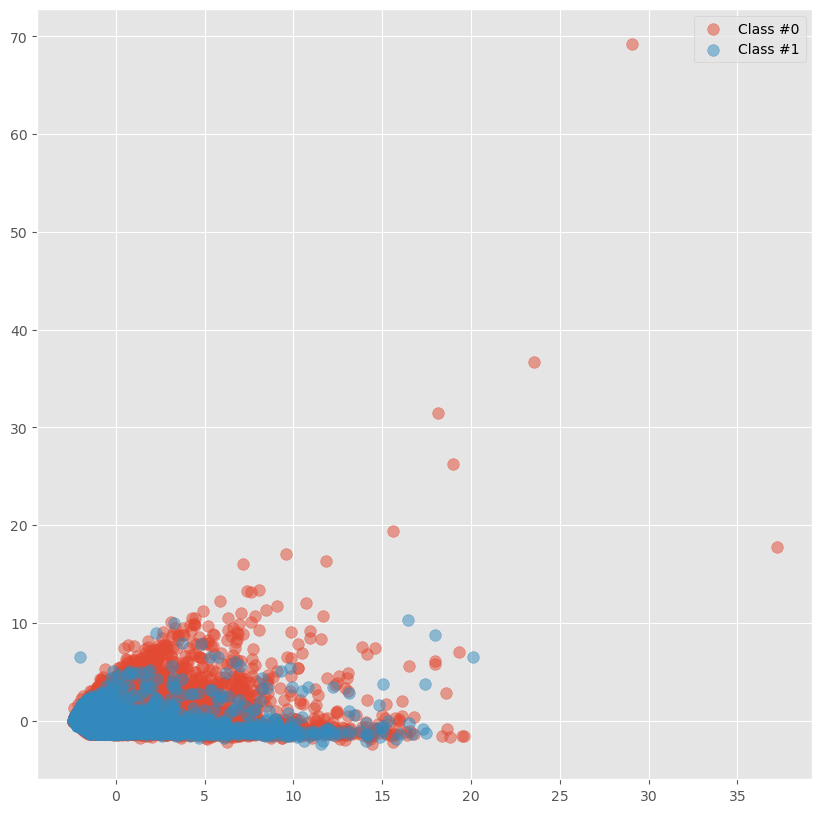

In [38]:
plot_two_classes(x_vis, y_np)

En el gráfico anterior se puede evidenciar que hay mayores individuos en la clase "0" (Aquellos que cumplen con su pago) que en la clase "1" (Aquellos que incumplen). Hay un 78% de clientes que pertenecen a la categoria "0" y un 22% que están en la categoria "1"

Target percentage 0.1
y.shape =  24986 y.mean() =  0.09997598655246938


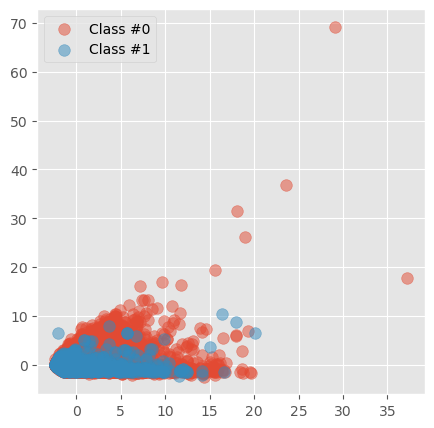

Target percentage 0.2
y.shape =  28110 y.mean() =  0.2


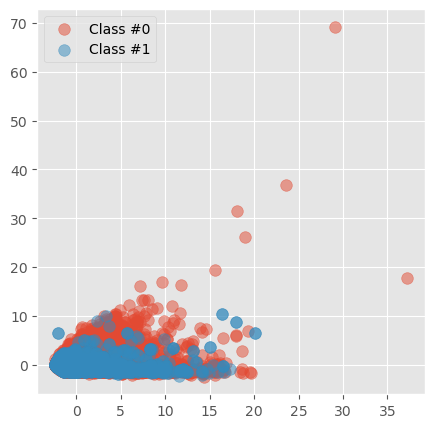

Target percentage 0.3
y.shape =  32125 y.mean() =  0.29998443579766537


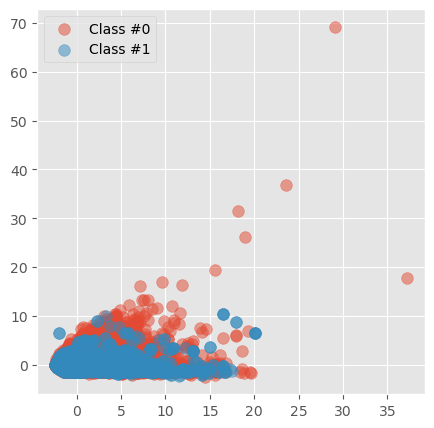

Target percentage 0.4
y.shape =  37480 y.mean() =  0.4


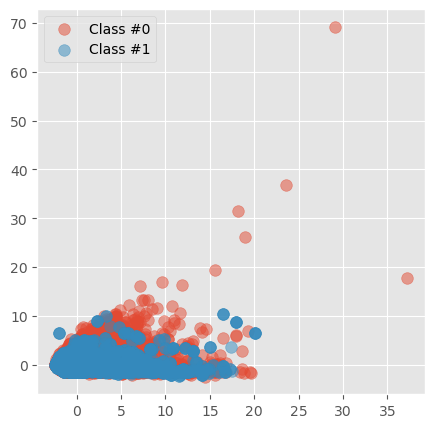

Target percentage 0.5
y.shape =  44976 y.mean() =  0.5


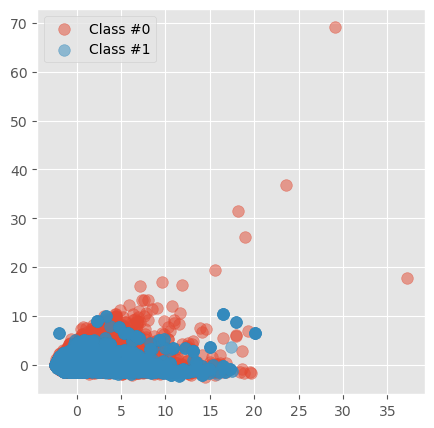

In [39]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y_np, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.astype(int).mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()   

De acuerdo a las gráficas, el promedio del valor Y que vendria siendo la cantidad de unos sobre la cantidad total de individuos se deicidió tomar un Target Percentage igual a 0.4. Pasando del 22% (Porcentaje de "1" en la base original a un 40% con ayuda del sobremuestreo). Se eligió este método ya que no se pierde información de la clase mayoritaria.

Utilizando todas nuestras variables explicativas...

In [40]:
X_np = X.to_numpy()
print("Número de filas y columnas para la variable X original:" , X_np.shape)
print("Número de filas y columnas para la variable Y original:", y_np.shape)

Número de filas y columnas para la variable X original: (28978, 78)
Número de filas y columnas para la variable Y original: (28978,)


In [41]:
X_u, y_u = OverSampling(X_np, y_np, 0.40, 1)
print("Número de filas y columnas para la variable X con sobremuestreo: " , X_u.shape)
print("Número de filas y columnas para la variable X con sobremuestreo: ", y_u.shape)

Número de filas y columnas para la variable X con sobremuestreo:  (37480, 78)
Número de filas y columnas para la variable X con sobremuestreo:  (37480,)


In [42]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,...,0,1,0,0,0,0,0,0,0,0
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,...,0,0,0,1,0,0,0,0,0,0
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,...,0,0,1,0,0,0,0,0,0,0
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,...,0,0,1,0,0,0,0,0,0,0
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,...,0,0,0,1,0,0,0,0,0,0
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0,0,1,0,0,0,0,0,0,0
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,...,0,0,1,0,0,0,0,0,0,0
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,...,0,0,1,0,0,0,0,0,0,0


In [43]:
X_u = pd.DataFrame(X_u)

In [44]:
X_u.columns = X.columns

In [45]:
X_u

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0.566484,0.277372,-0.706223,-0.699108,-0.685360,-0.679388,-0.670167,-0.659969,-0.347262,-0.255961,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.512040,-0.048124,0.634246,0.636812,0.733688,0.859389,0.913895,0.943438,-0.061641,0.093690,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.051302,-0.482118,-0.311887,-0.302083,-0.257318,-0.227261,-0.209965,-0.201528,-0.347262,-0.172940,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.666115,-0.373619,-0.603103,-0.596458,-0.683200,-0.677064,-0.657057,-0.649107,-0.347262,-0.249407,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.589078,-0.265121,0.057157,0.119636,0.184343,0.276674,0.362592,0.414093,-0.160988,-0.124875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,-0.203890,0.602867,1.169647,1.224061,1.317295,1.462680,0.143897,0.110744,0.025287,0.049907,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37476,-1.205377,0.819864,-0.586857,-0.553267,-0.685360,-0.679388,-0.670167,-0.659969,-0.223079,-0.255961,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37477,-0.512040,0.277372,-0.664970,-0.679097,0.797391,0.414808,0.468343,0.259185,-0.223079,4.628490,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37478,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y_u = pd.DataFrame(y_u)

In [47]:
y_u.columns = y.columns

In [48]:
y_u

,default payment next month
0,1
1,1
2,1
3,1
4,1
...,...
37475,0
37476,0
37477,0
37478,0


## Selección de variables

Para identificar las variables constantes

In [49]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_u) 

print(
    len([
        x for x in X_u.columns
        if x not in X_u.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X_u.columns[sel.get_support()]]

0


[]

Para identificar las variables cuasi-constantes

In [50]:
sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 90% of observations approximately
sel.fit(X_u) 

print(
    len([
        x for x in X_u.columns
        if x not in X_u.columns[sel.get_support()]
    ]))

[x for x in X_u.columns if x not in X_u.columns[sel.get_support()]]

43


['EDUCATION_4',
 'MARRIAGE_3',
 'PAY_0_-2',
 'PAY_0_3',
 'PAY_0_4',
 'PAY_0_5',
 'PAY_0_6',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-2',
 'PAY_2_1',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_1',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_1',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_3',
 'PAY_6_4',
 'PAY_6_5',
 'PAY_6_6',
 'PAY_6_7',
 'PAY_6_8']

Debido a que se tuvo que dicotomizar las variables cualitativas, muchas de ellas como por ejemplo el pago mensual de septiembre-abril de 2005 terminan con muchos valores cero en sus variables, por lo tanto el programa las toma como cuasiconstantes. Lo mismo ocurre con variables que tienen mas de dos categorias como el nivel educativo y el estado civil.

GANANCIA DE INFORMACIÖN

In [51]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
importances = mutual_info_classif(X, y)
importances

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.77010026e-02, 4.94700825e-04, 1.03815607e-02, 6.85340742e-03,
       6.77894591e-03, 4.94663154e-03, 6.31594757e-03, 3.50896440e-03,
       2.39050151e-02, 1.48234726e-02, 2.04756976e-02, 1.54931945e-02,
       1.45670673e-02, 1.15396275e-02, 0.00000000e+00, 2.75238587e-03,
       2.00960264e-04, 0.00000000e+00, 1.56185213e-03, 3.55220122e-04,
       2.76903374e-03, 2.57473127e-02, 5.45834224e-03, 5.34014149e-02,
       5.01716432e-03, 1.62229795e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.10034751e-03, 1.05316358e-03, 1.35829496e-02,
       2.36833127e-03, 4.33840034e-02, 3.38909377e-03, 4.08477513e-04,
       0.00000000e+00, 0.00000000e+00, 4.31778403e-04, 6.01183943e-03,
       8.40639180e-04, 5.34503413e-03, 0.00000000e+00, 2.94699058e-02,
       4.50881941e-03, 6.67392307e-04, 0.00000000e+00, 2.87813315e-03,
       3.81385271e-03, 9.72792593e-05, 1.21237275e-03, 7.19360468e-03,
       0.00000000e+00, 2.82801433e-02, 0.00000000e+00, 5.00410478e-03,
      

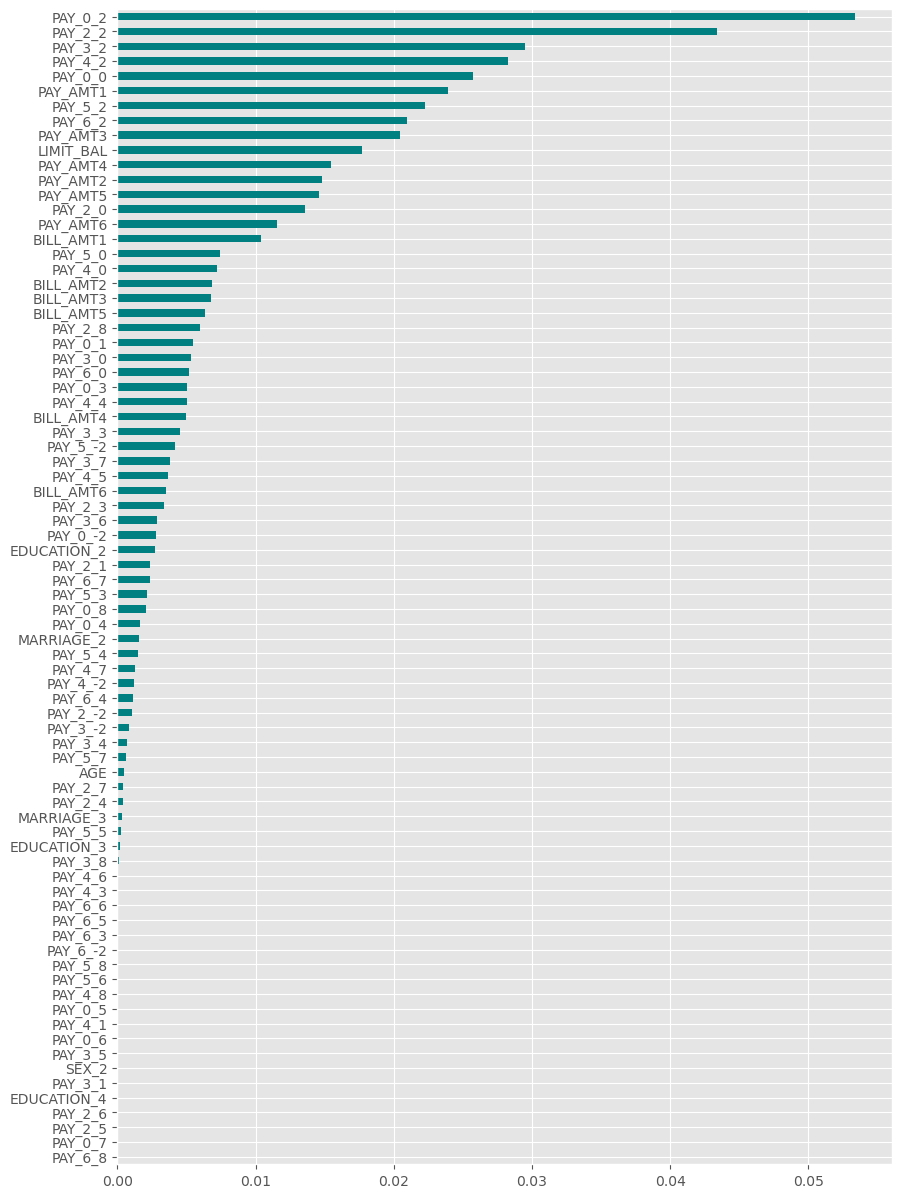

In [ ]:
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind = 'barh',
                      color = 'teal', figsize=(10,15)
                      )
plt.show()

In [ ]:
importances = mutual_info_classif(X_u, y_u)
importances

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.30638232e-02, 1.06862124e-04, 1.94381867e-01, 1.88620042e-01,
       1.83722587e-01, 1.78124411e-01, 1.74945660e-01, 1.74025746e-01,
       1.08521841e-01, 9.87351826e-02, 9.57979233e-02, 9.07365806e-02,
       8.77841111e-02, 8.29512867e-02, 8.32699210e-04, 7.16071045e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.37807033e-03,
       1.44859135e-03, 4.09064887e-02, 4.18189735e-03, 6.40854120e-02,
       8.90311126e-03, 1.73065053e-03, 1.23395096e-04, 0.00000000e+00,
       1.47272120e-03, 3.09333241e-04, 0.00000000e+00, 1.51673346e-02,
       1.28659011e-03, 5.21980586e-02, 5.95866528e-03, 0.00000000e+00,
       0.00000000e+00, 1.80961016e-03, 2.76444829e-03, 0.00000000e+00,
       5.73297912e-03, 1.35657314e-02, 0.00000000e+00, 4.56522523e-02,
       2.15422570e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.63398360e-04, 0.00000000e+00, 2.79961309e-03, 1.06155598e-02,
       0.00000000e+00, 3.42275216e-02, 5.04983211e-03, 7.64797123e-03,
      

In [47]:
from matplotlib import figure

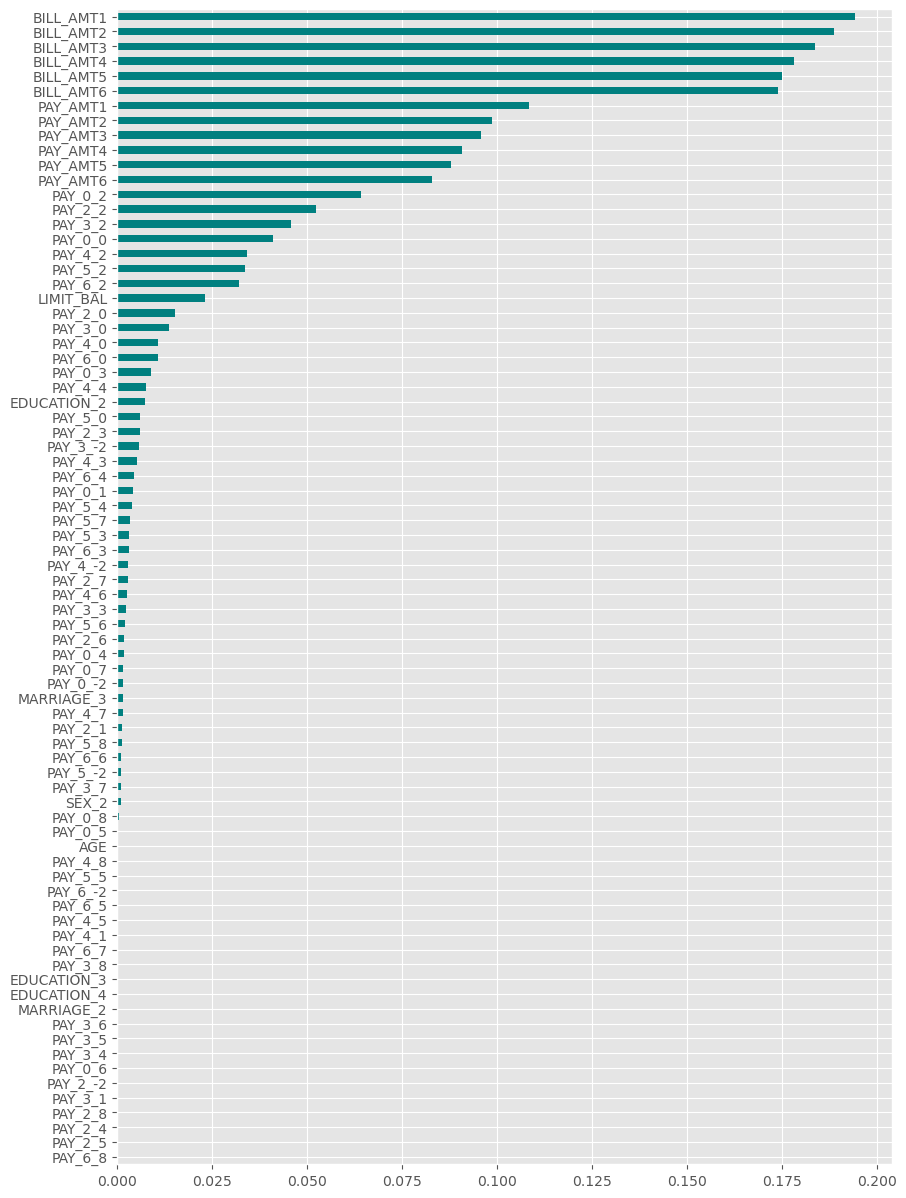

In [ ]:
feat_importances = pd.Series(importances, X_u.columns[0:len(X_u.columns)])
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind = 'barh',
                      color = 'teal', figsize=(10,15)
                      )
plt.show()


SELECCIÖN HACIA DELANTE

In [52]:
# separate train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_u,
    y_u,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((26236, 78), (11244, 78))

In [53]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

sfs1 = SFS(RandomForestClassifier(), 
           k_features=35, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3,
          n_jobs = -1)

sfs1 = sfs1.fit(np.array(X_train), y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:   21.6s finished

[2022-11-17 19:29:32] Features: 1/35 -- score: 0.7343539700359308[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:   58.9s finished

[2022-11-17 19:30:31] Features: 2/35 -- score: 0.8251986717468395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:   48.6s finished

[2022-11-17 19:31:20] Features: 3/35 -- score: 0.858659265452224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  75 ou

In [ ]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])

Variables originales dataset: Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6'

In [54]:
X_u = X_u.loc[:,['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'MARRIAGE_2', 'PAY_0_-2', 'PAY_0_0', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_7', 'PAY_3_5', 'PAY_3_8', 'PAY_4_-2', 'PAY_5_2',
       'PAY_5_4', 'PAY_6_0', 'PAY_6_2', 'PAY_6_4', 'PAY_6_6', 'PAY_6_7']]

In [55]:
X_u

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT5,...,PAY_3_5,PAY_3_8,PAY_4_-2,PAY_5_2,PAY_5_4,PAY_6_0,PAY_6_2,PAY_6_4,PAY_6_6,PAY_6_7
0,0.566484,0.277372,-0.706223,-0.679388,-0.670167,-0.659969,-0.347262,-0.255961,-0.295855,-0.316743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.512040,-0.048124,0.634246,0.859389,0.913895,0.943438,-0.061641,0.093690,-0.068553,-0.052742,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.051302,-0.482118,-0.311887,-0.227261,-0.209965,-0.201528,-0.347262,-0.172940,-0.148220,-0.217866,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.666115,-0.373619,-0.603103,-0.677064,-0.657057,-0.649107,-0.347262,-0.249407,-0.295855,-0.316743,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.589078,-0.265121,0.057157,0.276674,0.362592,0.414093,-0.160988,-0.124875,-0.165254,-0.165132,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,-0.203890,0.602867,1.169647,1.462680,0.143897,0.110744,0.025287,0.049907,-0.055777,-0.184907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37476,-1.205377,0.819864,-0.586857,-0.679388,-0.670167,-0.659969,-0.223079,-0.255961,-0.295855,-0.316743,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37477,-0.512040,0.277372,-0.664970,0.414808,0.468343,0.259185,-0.223079,4.628490,-0.068724,-0.184907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37478,0.412409,0.385870,1.856162,0.684042,-0.158261,-0.392932,0.180516,0.617948,-0.011770,0.012847,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


La mayoria de variables entregadas por el Random Forest Classifier también se encuentran en la selección de variables por ganancia de información, es por ello que para los modelos siguientes se tomaran como variables explicativas estas 35 caracteristicas las cuales fueron seleccionadas hacia delante teniendo en cuenta el criterio ROC_AUC. Se decidió tomar este tipo de selección ya que evalúa todas las posibles combinaciones de características simples, dobles, triples, etc. Es un método iterativo en el que empezamos por no tener ninguna característica en el modelo. En cada iteración, vamos añadiendo la característica que mejor mejore nuestro modelo hasta que la adición de una nueva variable no mejore el rendimiento, esto me asegura que el mejor modelo con 35 caracteristicas es el arrojado previamente. 

## Random Forest

Validación K-Folds

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
clf

RandomForestClassifier()

Entrenamiento y testeo 90/10

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size=0.10, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33732, 35) (3748, 35) (33732, 1) (3748, 1)


In [59]:
y_train1 = y_train

In [60]:
y_train1 = y_train1.replace({"0": 0, "1": 1})

In [61]:
y_train1.dtypes

default payment next month    int64
dtype: object

K folds con 5 grupos

In [57]:
range(1, len(X_u.columns)+1)

range(1, 36)

In [142]:
len(list(range(10, 320, 10)))

31

In [59]:
31*35

1085

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)
estimator_range = range(10, 320, 10)
feature_range = range(1, len(X_u.columns)+1)
random_pred_beta_k5 = []
random_pred_auc_k5 = []
j = 0
for feature in feature_range:
    for estimator in estimator_range:
        clf = RandomForestClassifier(n_estimators = estimator, max_features= feature, random_state=1, n_jobs=-1)
        random_pred_beta_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='f1').mean()) 
        random_pred_auc_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='roc_auc').mean()) 
        j+=1
print(random_pred_beta_k5,random_pred_auc_k5)        

[0.8684129170073598, 0.8799015414564966, 0.8840033286483789, 0.8841884658124984, 0.8860680272422984, 0.8856746671385766, 0.8861907897167429, 0.8861849339261223, 0.8857119612140526, 0.8858702387258471, 0.8857082741750943, 0.8864450757891367, 0.8865861290356655, 0.8862060392224833, 0.8865287241515796, 0.8866268595432565, 0.8861825093505109, 0.8864926363413883, 0.8868720587850518, 0.8867914625588853, 0.887085364520669, 0.8871910734773507, 0.8872959072990391, 0.8872057212468898, 0.8872582952982343, 0.8873001382871853, 0.8879736598640374, 0.8878241531813732, 0.8878692119338977, 0.8875958007646542, 0.8874203090387425, 0.8723515405948479, 0.8828982479151509, 0.8828448035445436, 0.8843366754716211, 0.8850133467975067, 0.8847578980850637, 0.8860538791308731, 0.8871559689725286, 0.8877369600252376, 0.8883248511073617, 0.8876068312447625, 0.888471828288316, 0.8883041314773636, 0.8881490287811153, 0.8884372004299113, 0.8880483380068058, 0.8880882901883208, 0.8882705622630255, 0.8884141816232525, 0

In [ ]:
print(random_pred_auc_k5)   

[0.9381742322538116, 0.9458713711674559, 0.9477077318424957, 0.9491071721090162, 0.9499699025743233, 0.9503870383825147, 0.9508180374496353, 0.951124890326154, 0.9514537391806078, 0.9517192762048513, 0.9517280920213516, 0.9518886835905999, 0.9519967703559512, 0.9521192948081086, 0.9521627960068088, 0.9522582865982651, 0.9523317166043717, 0.9524236872212862, 0.9524788592603569, 0.9525113037775708, 0.952591385054799, 0.9526468269786925, 0.9526772853388753, 0.9527395723617991, 0.952832850716246, 0.952898118295358, 0.9529405229031036, 0.9529301320355653, 0.9530358892961048, 0.9530471719577107, 0.9530456438037691, 0.9386680809080872, 0.9459872988227664, 0.9481397074496979, 0.9492117633260969, 0.9498913736880386, 0.9506717899631573, 0.9509293571388927, 0.9511269995813881, 0.9515464858787563, 0.9515041465840335, 0.9517007851772984, 0.9517766816029715, 0.9518982377923966, 0.9519828398801273, 0.9521664758318827, 0.9522599507263786, 0.9524009851438626, 0.9524136880986823, 0.9525328386819789, 0.9

In [ ]:
print(random_pred_beta_k5)   

[0.8684129170073598, 0.8799015414564966, 0.8840033286483789, 0.8841884658124984, 0.8860680272422984, 0.8856746671385766, 0.8861907897167429, 0.8861849339261223, 0.8857119612140526, 0.8858702387258471, 0.8857082741750943, 0.8864450757891367, 0.8865861290356655, 0.8862060392224833, 0.8865287241515796, 0.8866268595432565, 0.8861825093505109, 0.8864926363413883, 0.8868720587850518, 0.8867914625588853, 0.887085364520669, 0.8871910734773507, 0.8872959072990391, 0.8872057212468898, 0.8872582952982343, 0.8873001382871853, 0.8879736598640374, 0.8878241531813732, 0.8878692119338977, 0.8875958007646542, 0.8874203090387425, 0.8723515405948479, 0.8828982479151509, 0.8828448035445436, 0.8843366754716211, 0.8850133467975067, 0.8847578980850637, 0.8860538791308731, 0.8871559689725286, 0.8877369600252376, 0.8883248511073617, 0.8876068312447625, 0.888471828288316, 0.8883041314773636, 0.8881490287811153, 0.8884372004299113, 0.8880483380068058, 0.8880882901883208, 0.8882705622630255, 0.8884141816232525, 0

In [1]:
random_pred_auc_k5 = [0.9381742322538116, 0.9458713711674559, 0.9477077318424957, 0.9491071721090162, 0.9499699025743233, 0.9503870383825147, 0.9508180374496353, 0.951124890326154, 0.9514537391806078, 0.9517192762048513, 0.9517280920213516, 0.9518886835905999, 0.9519967703559512, 0.9521192948081086, 0.9521627960068088, 0.9522582865982651, 0.9523317166043717, 0.9524236872212862, 0.9524788592603569, 0.9525113037775708, 0.952591385054799, 0.9526468269786925, 0.9526772853388753, 0.9527395723617991, 0.952832850716246, 0.952898118295358, 0.9529405229031036, 0.9529301320355653, 0.9530358892961048, 0.9530471719577107, 0.9530456438037691, 0.9386680809080872, 0.9459872988227664, 0.9481397074496979, 0.9492117633260969, 0.9498913736880386, 0.9506717899631573, 0.9509293571388927, 0.9511269995813881, 0.9515464858787563, 0.9515041465840335, 0.9517007851772984, 0.9517766816029715, 0.9518982377923966, 0.9519828398801273, 0.9521664758318827, 0.9522599507263786, 0.9524009851438626, 0.9524136880986823, 0.9525328386819789, 0.9525167397188266, 0.9525356203641172, 0.9525459535668771, 0.9526618254599054, 0.9527410007539354, 0.9527589738950184, 0.9527881445701463, 0.9528171332722628, 0.9528272059477512, 0.9528484953881243, 0.9528352663201124, 0.9528356375617018, 0.9376881034455744, 0.9454517348518481, 0.9474115937575582, 0.9488131270530337, 0.9495949286462413, 0.9502773222148988, 0.9505951428753358, 0.9507727879372598, 0.9508719551758965, 0.9513248215481965, 0.951415238431184, 0.9515499430719225, 0.9518421496903491, 0.9519816897308774, 0.9519032917960131, 0.9519132871841285, 0.9520160844409753, 0.9521443205990441, 0.9522623353395033, 0.9523470232024825, 0.9523939138695263, 0.9524450113673069, 0.952430858193915, 0.9524471619623244, 0.9525807897728107, 0.9526320077029536, 0.952623812333729, 0.9526414541883031, 0.9527268391973983, 0.9527715680441171, 0.9527893327223929, 0.9391682929867915, 0.9463140290149885, 0.9481025213840631, 0.949435340622586, 0.9501657701458319, 0.9508483293628405, 0.9511526337344431, 0.9513598482453398, 0.9515507406947034, 0.9516595424733417, 0.9517375901111176, 0.9518303924246497, 0.9520145625521016, 0.9521510151063524, 0.9521967336429004, 0.9522573775143085, 0.9522902105785785, 0.9524251276572148, 0.9524303662306112, 0.9524550351743107, 0.9524536169235744, 0.9524691134419081, 0.9526034683166309, 0.9526439647870294, 0.9526640015543008, 0.9527128697925662, 0.9527376080797001, 0.9527380601398822, 0.9527217408396828, 0.9527587349244117, 0.9526950179872008, 0.938943815885182, 0.9468339903439258, 0.948637985307814, 0.9497872399885459, 0.9503711619964991, 0.9507127640496684, 0.9510426497259392, 0.951227141409046, 0.951278354064222, 0.9514704130836412, 0.9517159377618596, 0.951826968030965, 0.9519825703682822, 0.9520455818044773, 0.9520850544293881, 0.9521152079438314, 0.9521180574980237, 0.9520910999385521, 0.9522201122102152, 0.9522340941622469, 0.9522663526283786, 0.9522863850639774, 0.9522678466591362, 0.9522281878021616, 0.9522173993815823, 0.952247331014455, 0.9522300175984068, 0.9522248728199181, 0.9522391597440443, 0.9522096764423017, 0.9522237686406448, 0.9370600616841696, 0.944424868224685, 0.9468039003101785, 0.9479361057337738, 0.9493512759691711, 0.949997173274344, 0.9503393086830257, 0.9504942354658568, 0.9506876944888907, 0.950990956743168, 0.9511267525304457, 0.951204854790505, 0.9513875454599349, 0.9514337426797151, 0.9514719915586347, 0.9516048904171226, 0.9516927265944201, 0.9517769191699686, 0.9518429890772893, 0.9518519409550935, 0.9519511378132585, 0.9519707810965622, 0.9520490781939168, 0.9520866592347517, 0.9520987959296482, 0.9520846378186718, 0.9521308835639448, 0.9521462458352866, 0.9521091039539902, 0.952156957524411, 0.9521940204825443, 0.9374322368369781, 0.945187308121642, 0.9472862186619715, 0.9486911824030901, 0.9494269544743158, 0.949938408056275, 0.9501662117949683, 0.9503683604168192, 0.9508265269639201, 0.9510692125054785, 0.9512338249194172, 0.9513257059468823, 0.9513951493242505, 0.9514623188937368, 0.9514581536894461, 0.9515366268348583, 0.9515885000378473, 0.9516416182399527, 0.9517688559554388, 0.9517971287280427, 0.9517168372585303, 0.9517449525377589, 0.9517946511332684, 0.9518935543908572, 0.951878727414256, 0.9519375304778386, 0.9519161843953364, 0.9519273147255441, 0.9519299383488953, 0.9519990568815772, 0.9520048262314852, 0.9387169998428101, 0.946588021798072, 0.9481525462343511, 0.9489772925658068, 0.9497955606025823, 0.9503831595803005, 0.950672863943212, 0.950638552479487, 0.9507054311093773, 0.9509000913519412, 0.9510647814994287, 0.9512017818049296, 0.9514438701279696, 0.9514431388946525, 0.9514810418490542, 0.9515831197457478, 0.9516889693487048, 0.9517341161472969, 0.9517755087832633, 0.9518233651472403, 0.9519414313597906, 0.9519889332188907, 0.9520352842875118, 0.9520359086944724, 0.9520229547705796, 0.9519781735800109, 0.9519533148461742, 0.9519382443335124, 0.9519202668872137, 0.9519215673623658, 0.9519142985967054, 0.9387957291512997, 0.9446750586159951, 0.9470570354671226, 0.94849607714191, 0.9493396958277807, 0.9496419201831046, 0.949965283026369, 0.9502745345029492, 0.9506191101344905, 0.9507606910163778, 0.9509121814020585, 0.950897343072396, 0.9510823341755149, 0.9510230309724221, 0.9510839246373741, 0.9511000526604342, 0.951065223197881, 0.9511795990073935, 0.9512127672337096, 0.9512804395466754, 0.9512643703032364, 0.9512970026890881, 0.9513227044414304, 0.9513300354517902, 0.9513910163933543, 0.9513614329499029, 0.951399862534218, 0.9514248592347618, 0.9514426964313245, 0.9514582178654001, 0.9514389419859975, 0.9373343705803745, 0.9446561011662069, 0.9463919510381619, 0.9474504350581816, 0.948127709419453, 0.9487534904095506, 0.9488906894298769, 0.9490896239534592, 0.9494606354705137, 0.9497278165544719, 0.9500510422298276, 0.9502516207282001, 0.9502661327623116, 0.9502495860161592, 0.9503310358082574, 0.9503547214033412, 0.9505108334792622, 0.9505616522211454, 0.9506997282322457, 0.950773621713136, 0.9507922868259591, 0.95086002900463, 0.9509519447503448, 0.950959504057586, 0.9509975319304262, 0.95098416519089, 0.9510620187331946, 0.9510328370760174, 0.9510640504091791, 0.9510850419239535, 0.9510906781248766, 0.9381827773669539, 0.9453864850704681, 0.9471503508889185, 0.9484298269857889, 0.9490713621453424, 0.9493517820296059, 0.9493913044967712, 0.9495514317833316, 0.9498506098170741, 0.9500972209977012, 0.9501758848589732, 0.9503118662873306, 0.9504337330053074, 0.9504152428975464, 0.950562654250777, 0.9507211996772359, 0.9507321970601208, 0.9508463556401747, 0.9509702820937651, 0.9509770402718767, 0.951013734229839, 0.9510256319083841, 0.9509791986562645, 0.9509999498762607, 0.9510466289600462, 0.9510042104355296, 0.950999926649734, 0.9510260641505557, 0.95102883254065, 0.9509900899766063, 0.9510034958433847, 0.9369953506348985, 0.9444834073600928, 0.9464930820882987, 0.94739618239489, 0.9480588779881971, 0.9488138080279785, 0.949255045268823, 0.94947036685705, 0.9497094175051229, 0.9497451359621027, 0.9500311963383739, 0.9502410069745071, 0.9502831863625113, 0.950434810134602, 0.9505461240556589, 0.9506357146636614, 0.950680444690087, 0.9507370667404897, 0.950744559357825, 0.9507771553124881, 0.9508775627779151, 0.9509141936117922, 0.9509447320940225, 0.9509806850381928, 0.9509772868750218, 0.9509771266797109, 0.9509952216462565, 0.951021024995167, 0.9510370678539489, 0.9510738345995657, 0.9510842075949487, 0.9372099131449672, 0.9450921937125063, 0.9469038648019833, 0.9479273683323092, 0.9488347359775853, 0.949133046732457, 0.949436332277857, 0.9495778604296363, 0.9498451925763132, 0.9500142257902697, 0.9502287474435928, 0.9503804245455327, 0.9502598002969812, 0.9503938558641426, 0.9504648337526251, 0.9505134218321913, 0.9505103265386582, 0.9504644054829517, 0.9505874154862859, 0.9506238957145181, 0.9506401178665709, 0.9506810572738807, 0.9507993616681452, 0.9508899832123987, 0.9509319983021921, 0.9509329463040602, 0.9509743600074849, 0.9510597796336278, 0.9511135312473536, 0.9511393150122502, 0.9511282844708184, 0.9359919406170712, 0.9434164907156226, 0.9457937523430889, 0.9470090093507662, 0.947985755973795, 0.9481827651127647, 0.9485429931998045, 0.9488176768855364, 0.9490647812343876, 0.9493106008075417, 0.9494443876387135, 0.9496545142831495, 0.9498282924316209, 0.9498211371644842, 0.950028654482059, 0.9501346338204234, 0.9501768424186793, 0.9502484716469921, 0.9503183233885141, 0.9503906402506406, 0.9504919977820899, 0.9505021256449361, 0.950550870754277, 0.9505951143755584, 0.9506179891105419, 0.9506792113527123, 0.9506331272379877, 0.9506432067005018, 0.9506376617067588, 0.9506853867077236, 0.9507153737228299, 0.936657088740634, 0.9444217596166986, 0.9471888904447848, 0.9483731425935555, 0.948818935624613, 0.949246391316952, 0.9492239081708407, 0.9493911698435245, 0.949575943212533, 0.9497136332802437, 0.9501248513048427, 0.9502860302530051, 0.950445591734326, 0.9505795676352105, 0.9505970967893287, 0.9505451616195048, 0.9505665875748317, 0.950591396536382, 0.9506003178564834, 0.9506796753056965, 0.9507033958197295, 0.9506922541121963, 0.9506838930929031, 0.950748152106921, 0.9507574855302325, 0.9507637491202756, 0.9507846105571206, 0.950763637579502, 0.9507793112330907, 0.950784200898956, 0.950816584761571, 0.9359760400418494, 0.9437830557188273, 0.945885692617435, 0.947144692956994, 0.9478701689958235, 0.948237214509495, 0.9485544862293832, 0.948892068303668, 0.9491123603572179, 0.9494178313113381, 0.9494250883294324, 0.9495857577607957, 0.9498417160134321, 0.9500089704768753, 0.950117601947005, 0.9501928214055347, 0.95014324110138, 0.9502613038963468, 0.9503806726968012, 0.9503530418322109, 0.9504299920751311, 0.9505191217231943, 0.9505696381268466, 0.9505959816684356, 0.9505749542838334, 0.9505881978131434, 0.9505593434173818, 0.9505397489821888, 0.9505549110356206, 0.9505943344438806, 0.9506159733099386, 0.9372468863309251, 0.9451131096430911, 0.9468386644722047, 0.947788770032378, 0.9484496022143485, 0.9489020794997398, 0.9488725932416784, 0.9492086729348934, 0.949531273418571, 0.9497202363080224, 0.9496776662686814, 0.9498046839850092, 0.95005000266876, 0.9501822369302289, 0.9503076013696067, 0.9503525982924443, 0.9503617954058804, 0.9503479516417034, 0.9504395677563616, 0.9505874618357278, 0.9506257211027105, 0.950653509355811, 0.9506494588125166, 0.9506768430571858, 0.950665941740449, 0.9506489340385041, 0.950701867782688, 0.950647663312117, 0.9506782943667481, 0.950674941888121, 0.950635904395047, 0.9355458771269275, 0.9428439991459652, 0.9448045961299387, 0.9462253265233581, 0.947107036878134, 0.947520849252, 0.9479567702216242, 0.9482729186666464, 0.9482966507583193, 0.9484110701986118, 0.9486093336562258, 0.948722392546489, 0.948768350196314, 0.9489424592148634, 0.9490596211790576, 0.9490559199212086, 0.9490770686000151, 0.9492231730239309, 0.949308690331222, 0.949439432475143, 0.949509357357542, 0.9495388297599223, 0.9496222333721074, 0.9497133697461326, 0.9497941742645247, 0.9498611024090231, 0.9498749439118079, 0.9498896672059611, 0.9499166205861354, 0.949948988450514, 0.9499594938581488, 0.9349608053913879, 0.9438090304264154, 0.9453224775837835, 0.9472721729623574, 0.9478323919596271, 0.9483028851074176, 0.9485129996792144, 0.948719021357731, 0.9488826769624488, 0.9489394422478388, 0.9492715478766429, 0.9493675614282895, 0.9492337003667355, 0.9493435465372654, 0.949493484206195, 0.9495316661459319, 0.949602572417553, 0.9496459441803058, 0.9496692603233405, 0.9496429823064917, 0.9496175875617722, 0.9496589785044088, 0.9497127957752479, 0.9498142682133628, 0.9498352531531171, 0.949960343656705, 0.949946268518436, 0.9499214410272282, 0.9499213399496185, 0.9498968843024234, 0.949840851921001, 0.9358720328759542, 0.9439710268462782, 0.9460756794360179, 0.9471460601427679, 0.9476660056803631, 0.9481551439409769, 0.9485692110051305, 0.948708420449828, 0.9489309080117462, 0.9491918246517171, 0.9492381633652128, 0.9494436430201765, 0.9494892695417324, 0.949649619951696, 0.9496399641177309, 0.9496948720663413, 0.9498001307574103, 0.9497847338969002, 0.9498433987004409, 0.9498869191222006, 0.9498923467864925, 0.9499196137990445, 0.9499932736424377, 0.9500464572139663, 0.9500558189387351, 0.9500568460007617, 0.9501175229753626, 0.9501132043236804, 0.9501358607896513, 0.9501622847516364, 0.9502268598560446, 0.9369109750346325, 0.9439018083388511, 0.9460167156219537, 0.9468978103455259, 0.9479140734819801, 0.948130290971649, 0.948257838534776, 0.94845241442517, 0.948666094881623, 0.9488539349708354, 0.9489154720991848, 0.9490252010572918, 0.9490962820387994, 0.9492232646516305, 0.949289533464421, 0.9494129952891541, 0.949569955105525, 0.9496487267423426, 0.9496822484208906, 0.949715226774616, 0.9497773584457961, 0.9497464042578143, 0.9497476576448143, 0.9498152201216759, 0.9499200467523451, 0.9499037478771261, 0.9498962547171732, 0.9499118467663926, 0.9499268605389922, 0.9499947634609761, 0.9499823942476503, 0.9346095917761715, 0.9427454168505838, 0.9453425916505696, 0.9467096788996514, 0.9473432172856487, 0.9476469154376039, 0.9479418102979095, 0.9481374242346075, 0.9483307496121416, 0.948484742248724, 0.9486636645787658, 0.9487773735745295, 0.9489295382403112, 0.9490935454773798, 0.9492024698057783, 0.9492798534496638, 0.9493179159595092, 0.9493884481872303, 0.9494489247702054, 0.9494759455400633, 0.9495634587630016, 0.9495391251974281, 0.9495808928236572, 0.9495211188655484, 0.9495110189946242, 0.9495440223939614, 0.9495869725318486, 0.949654115109374, 0.9497124170210312, 0.949746861745032, 0.9496819761382636, 0.9357527393579599, 0.9437414179318993, 0.9463100937120927, 0.9474550489938004, 0.9479560236717797, 0.9482361832761121, 0.9484671613899673, 0.9487335712713083, 0.9487581215208142, 0.9489171991479323, 0.9490274448195585, 0.9491208510607236, 0.9492563833731401, 0.9492154546053394, 0.9493977028534598, 0.9494403273303211, 0.9494752741297038, 0.9495798829128563, 0.9496413241864768, 0.9496157511279192, 0.9496766317264885, 0.9497241791944437, 0.9497516816283975, 0.9497650390545701, 0.9498282413812934, 0.9498775100675146, 0.9499118140689813, 0.9499906744117175, 0.950033361079168, 0.9500348138216923, 0.9500626659305702, 0.93569961975726, 0.9424744319984409, 0.9448491889074339, 0.9460683413727257, 0.9469290282944536, 0.9475382268765109, 0.9478588493281658, 0.9482380448443408, 0.9485129682821902, 0.9484741149402958, 0.9484527890718768, 0.9486022915757856, 0.948660185054725, 0.9488190099537309, 0.9489508526543302, 0.9489840843944031, 0.9490994231542784, 0.9492126694009464, 0.9493315984179251, 0.9494217710337299, 0.9495422847798309, 0.949519893636986, 0.9495165118433938, 0.9496071254781195, 0.9496658936977814, 0.949630851801998, 0.949598737462734, 0.949607238637812, 0.9496429926670344, 0.9496688057694277, 0.9496830191351469, 0.9356504106474398, 0.9438796089699327, 0.9461878820977493, 0.9473826227417568, 0.9478617138101395, 0.9479638164177248, 0.948329116761696, 0.948546458660824, 0.9487327181533093, 0.948830162757375, 0.9489389701735421, 0.948981824752963, 0.9491437937106246, 0.9492568672291226, 0.949292756565274, 0.9493238629063867, 0.9493036775510942, 0.9492865996523328, 0.949368941805701, 0.9493217841360193, 0.9494204488890183, 0.9494282859183023, 0.9494761693108881, 0.9495351313401894, 0.949554012685293, 0.9495628143815337, 0.9496053256182023, 0.9496725172061622, 0.9497076761694151, 0.949779788839429, 0.9497688985977504, 0.9360128603288981, 0.9436547983233359, 0.9455388227328978, 0.9473208797057605, 0.9478383179171697, 0.9482260127429407, 0.9484673978878281, 0.9487162260373934, 0.9489940872384135, 0.9490213623480962, 0.94909470054702, 0.9491041397866173, 0.9492193640596123, 0.9493443167749765, 0.9493629195976437, 0.9494177545863819, 0.9494303951180127, 0.9495481111701523, 0.9495785812017484, 0.9496071578747877, 0.9496298202101598, 0.949678007402445, 0.9497412936209685, 0.9497599488874945, 0.9497812728473655, 0.9497804148545086, 0.949759045373149, 0.9497632301565829, 0.9497806723482464, 0.9498005433000729, 0.9497697948584666, 0.9346558752618659, 0.9424247949088137, 0.9448929692215515, 0.9462892497493225, 0.9473335815548323, 0.9478491243924726, 0.9481397220753471, 0.9482632177976098, 0.9483754988918154, 0.9485647856051509, 0.9488219847397698, 0.9488500787572857, 0.9490561385717452, 0.9492496568530286, 0.9492465855555995, 0.9493091054756263, 0.9493828327618574, 0.9494222601810314, 0.9495006561215835, 0.9495458384485506, 0.9495476793782203, 0.9495564737911828, 0.9496227619847379, 0.949610193828822, 0.949633495287981, 0.9496529733557925, 0.9496308512783284, 0.949705983504859, 0.9498040144645497, 0.9498065106678872, 0.9498049293615349, 0.9347076922985211, 0.9427229037339293, 0.9455799199117283, 0.946918799365343, 0.9476328698286649, 0.9476051915126664, 0.9478981314298757, 0.9482068370160922, 0.9483314190870928, 0.9485492614606402, 0.9485803727225036, 0.9488282419483302, 0.9488496161725186, 0.9489700796872327, 0.9489879487409434, 0.9489836874419568, 0.9490314396693706, 0.9490463424029247, 0.9490838991845507, 0.9491836062940899, 0.9492095644997519, 0.9492934506032024, 0.9493282747283832, 0.9493033369497927, 0.9493128550541137, 0.949332543322922, 0.9493422635452724, 0.9493831963955162, 0.949427212931222, 0.9494548416305039, 0.9495075360698152, 0.9351409932752308, 0.9428207138695213, 0.9450145754771923, 0.9462567084126029, 0.9469786579438366, 0.947441472277131, 0.9477746711272699, 0.947942768876015, 0.9483811606608882, 0.9485369301569389, 0.948721897936872, 0.9487947571814704, 0.9488279506770884, 0.9489348902481394, 0.9490340110082457, 0.9490157733668984, 0.9490318040865511, 0.9490607432376693, 0.9491059830134695, 0.9491683082085405, 0.9492113430081067, 0.9492455545773965, 0.9492834718646469, 0.9492915899178838, 0.9493525549370855, 0.949331752750599, 0.9493641773634918, 0.9493427218707551, 0.9493819735004501, 0.9494156258384902, 0.9493719011561448, 0.9361189392486621, 0.9430874292807822, 0.9459724549748383, 0.9471695221368813, 0.9476629525244121, 0.9482548409964184, 0.9483495025641797, 0.9485769076356952, 0.9486626238377023, 0.9486474437983692, 0.9488116879076447, 0.9489034401009251, 0.9490598246837623, 0.949194781834404, 0.949316782721865, 0.949314256418087, 0.9492342841125996, 0.9491974756837518, 0.949175615173278, 0.9491468572276609, 0.9492366262565973, 0.949238243360264, 0.9493363439325927, 0.9493324061903274, 0.9493724541787915, 0.9493441202511373, 0.9493280245146345, 0.9493628777466734, 0.9493544098917971, 0.9492882141617491, 0.9493078677282025, 0.9341926882997338, 0.9417121028136695, 0.944286215325163, 0.9457751716712532, 0.9464308811228206, 0.9468640128440367, 0.9471307397070051, 0.9474960059094727, 0.9478597101932742, 0.9480275109776677, 0.9482636323965302, 0.9483512439987871, 0.9484415906297841, 0.9485588350493754, 0.9486529019841367, 0.9486902821283099, 0.9487182802937137, 0.9486995654309844, 0.9486846083650393, 0.9487283331137852, 0.9487367138231433, 0.9488189783087575, 0.9488925350414812, 0.9488416563831015, 0.9488616005569623, 0.9488637100527623, 0.9488581880300717, 0.948812434189706, 0.9488596915289816, 0.9488819116371003, 0.9488700280520488, 0.9355350039590853, 0.9425409793239539, 0.9451871824525468, 0.9464282606789626, 0.9472960658047149, 0.9476439072093449, 0.9477156837781792, 0.9480525424144106, 0.9482329305762253, 0.9482795913640206, 0.9482830430680718, 0.9483365977220026, 0.9485233360866909, 0.9486250010771695, 0.9487059759101711, 0.9487418600738247, 0.9488440588189728, 0.9489167017878171, 0.9489979596580383, 0.9489993719547829, 0.9490531768218036, 0.9490940784706344, 0.949198021350979, 0.9491322102663761, 0.9492105138422282, 0.9492130442756513, 0.9492205446244697, 0.9492844372481342, 0.9492971398162634, 0.9493254617010477, 0.949364988197068, 0.9339707536636069, 0.9422219411589776, 0.9445308480536365, 0.9458376862904935, 0.9466111907714814, 0.9470522017598828, 0.9476302897666681, 0.9478745771471908, 0.9480793997719305, 0.9482508389919273, 0.9484958665190828, 0.9486290941743094, 0.948686574652371, 0.9486949077736432, 0.9487226970544951, 0.9487216908832078, 0.9486817363885921, 0.9487104538733966, 0.9487292952081722, 0.9486759787108197, 0.9487755069127293, 0.9488108017814477, 0.9488341565806913, 0.9488595858435047, 0.9489457541420185, 0.9488976717497352, 0.9489098281884403, 0.9489100970671869, 0.9488616204165485, 0.9489052074300425, 0.9489391469979769, 0.9341214512079382, 0.9419054236780589, 0.9450234610316853, 0.9460683019363476, 0.9466266756416178, 0.9468841692327523, 0.9472283065563623, 0.9475555170612381, 0.9477626997293704, 0.9478968294718266, 0.9480433832709064, 0.9481334851701195, 0.9481762248644291, 0.9483765848642702, 0.9484303577114224, 0.9485521495674061, 0.9486100604809131, 0.9487020326525439, 0.9486719029702891, 0.9487050079890873, 0.9487024002803214, 0.9487668542075314, 0.948848176504128, 0.9488307699851205, 0.9488699875436788, 0.9489306349848505, 0.9489170026379885, 0.9489657273849978, 0.9490216933173006, 0.9489822134752852, 0.9490202554351919, 0.9340271150145355, 0.9412231660845916, 0.9437486131627054, 0.9450739303576914, 0.9460090114951271, 0.9463442901899723, 0.9466869153585018, 0.947034485752589, 0.9472528668257023, 0.9474309472108144, 0.9475284510047605, 0.947680464303392, 0.9477841306735705, 0.9479601226917851, 0.9480490786442518, 0.9481433212012245, 0.9481251965296646, 0.9482631192984661, 0.9482451430546437, 0.9483200114698672, 0.9483915425369741, 0.9484839371208164, 0.9485761811326135, 0.9485805135906684, 0.9486343761770486, 0.9486382022716364, 0.9486460718130914, 0.9486639229399151, 0.9486958977312249, 0.9487002860908836, 0.9487316499220796]

In [3]:
len(random_pred_auc_k5)

1085

In [2]:
random_pred_beta_k5 = [0.8684129170073598, 0.8799015414564966, 0.8840033286483789, 0.8841884658124984, 0.8860680272422984, 0.8856746671385766, 0.8861907897167429, 0.8861849339261223, 0.8857119612140526, 0.8858702387258471, 0.8857082741750943, 0.8864450757891367, 0.8865861290356655, 0.8862060392224833, 0.8865287241515796, 0.8866268595432565, 0.8861825093505109, 0.8864926363413883, 0.8868720587850518, 0.8867914625588853, 0.887085364520669, 0.8871910734773507, 0.8872959072990391, 0.8872057212468898, 0.8872582952982343, 0.8873001382871853, 0.8879736598640374, 0.8878241531813732, 0.8878692119338977, 0.8875958007646542, 0.8874203090387425, 0.8723515405948479, 0.8828982479151509, 0.8828448035445436, 0.8843366754716211, 0.8850133467975067, 0.8847578980850637, 0.8860538791308731, 0.8871559689725286, 0.8877369600252376, 0.8883248511073617, 0.8876068312447625, 0.888471828288316, 0.8883041314773636, 0.8881490287811153, 0.8884372004299113, 0.8880483380068058, 0.8880882901883208, 0.8882705622630255, 0.8884141816232525, 0.8884454378289774, 0.8883950143570942, 0.8884825110669254, 0.8882562742448986, 0.8881153369761187, 0.8877355273684557, 0.8877672000985581, 0.887761171461244, 0.8877540899855237, 0.8875091904309871, 0.8875645690532827, 0.8874503723794456, 0.8699747708375261, 0.8819337622032482, 0.8848572677741074, 0.8860793971573871, 0.8866262471241807, 0.8871588115965668, 0.8881120255041844, 0.8877705081331848, 0.8877740336370087, 0.8879324312543175, 0.8876499432680586, 0.8878692523919179, 0.8876316322462138, 0.8879443370741036, 0.8879487635878933, 0.8882676995068024, 0.888066971902205, 0.8881813819154436, 0.8878588767259064, 0.8883923125740771, 0.8882466136841798, 0.8879264164923404, 0.8881905579010526, 0.8881221916587881, 0.8880364613721582, 0.8878336621165884, 0.8879148341298881, 0.8881050407318464, 0.887961261869321, 0.8884356842461718, 0.887946875124195, 0.869567744720991, 0.8810655111931549, 0.8834155153783254, 0.8858706989722839, 0.8866767476372452, 0.8871541311219943, 0.8874045318877576, 0.8878772809113187, 0.8880966296304141, 0.8882371190065463, 0.8882058772143038, 0.8883475182690871, 0.8884105830667757, 0.8883338155544382, 0.8883563400218264, 0.8881745225755564, 0.8881697621699909, 0.8882598590484004, 0.8876957460113551, 0.8881419768859509, 0.8881979288905377, 0.8882289796955863, 0.8885847192910015, 0.8882287566678674, 0.8878718000606689, 0.8881891051064115, 0.8877810357714033, 0.8875076641947185, 0.8872322931853154, 0.8872216973847763, 0.8873374427417238, 0.8705512650083153, 0.8827496695490373, 0.886451381696738, 0.8862441798834733, 0.8859757292627556, 0.8874174618138124, 0.8872109737440086, 0.8875900651183197, 0.8870047104947549, 0.8871972260462817, 0.8878663966930965, 0.8878277698196891, 0.8874457806237863, 0.8875053665887458, 0.8878590768551545, 0.8882881489327922, 0.8880639717244158, 0.8880970829059198, 0.8883252430729666, 0.8881483157457485, 0.8884000538515597, 0.8880258235317087, 0.8880990931681394, 0.8880693957745281, 0.8881493822462156, 0.888217674577821, 0.8886340768186765, 0.8888072928359989, 0.888841524523099, 0.8885866287622683, 0.8888086153920423, 0.8676981811824817, 0.8799566028931027, 0.8830899764917038, 0.884591406885059, 0.8858093190432175, 0.8863839998877049, 0.8869132132428167, 0.8870881321143544, 0.8861804372442721, 0.8863393966866754, 0.8863289831053358, 0.8865031600515245, 0.8865386991702302, 0.8866665265599192, 0.8866907003717467, 0.8867908813745127, 0.8872921887011043, 0.8868904497904125, 0.8871445579832443, 0.8874985392265555, 0.8878659042906369, 0.8877155994227925, 0.887742591816164, 0.8877224463934347, 0.8877301427886171, 0.8880339283441664, 0.8877067407230335, 0.8874795712348915, 0.8874659737947225, 0.8876200871427342, 0.88776930435202, 0.8720167382124254, 0.8830425201967811, 0.8843999773356392, 0.8857779919111131, 0.885771653695706, 0.8876995298725123, 0.8875345824141381, 0.8870604849419361, 0.8878066047656852, 0.8877110083100032, 0.8881871684846973, 0.8876725039526274, 0.8876769318355271, 0.8879037968725321, 0.8885323340632121, 0.8883062536906039, 0.8881701394598333, 0.887715512094531, 0.887709968465275, 0.887783853670715, 0.8877347321810097, 0.8879024433909743, 0.8878841032030496, 0.8878409229470463, 0.8878784398925432, 0.887626460831638, 0.8875270432211604, 0.8877149309202708, 0.8879791472448698, 0.8881239537407513, 0.8878642234062321, 0.8695949541468426, 0.8817086670261304, 0.8854947893668603, 0.885470503481848, 0.8866982681352553, 0.8870297681561116, 0.8867793939672385, 0.8871551479074615, 0.8877072958997392, 0.8878077783205252, 0.8877550496785684, 0.8881233134714617, 0.887627719885901, 0.887313035069335, 0.8875388936246649, 0.8878214743635298, 0.8880136574206979, 0.8877906377183411, 0.8880515773393169, 0.8875237993424314, 0.8872267711597436, 0.887449411409692, 0.8871865371093332, 0.8872163128822574, 0.8874730394752834, 0.8871593746986403, 0.8869340307841771, 0.8872881886925261, 0.8873017376585415, 0.8871650962379904, 0.8872798664558669, 0.8684597734152071, 0.8808440661708563, 0.8840000663719344, 0.8851127735533882, 0.8855198176765715, 0.8866535614347045, 0.8865519723803729, 0.8872142363183129, 0.8868221872780719, 0.8866374910599628, 0.8867027940322447, 0.8866088790509906, 0.8871340061337125, 0.88749514193, 0.8872149280468509, 0.8873863053985351, 0.8877835953059534, 0.8875610048047499, 0.887721450839327, 0.8875233297785691, 0.8879251850080623, 0.8877864042923502, 0.8876791676373669, 0.8878156555058713, 0.8877792154124167, 0.8878602438862311, 0.8881001161286038, 0.8879718235508497, 0.8879951169353406, 0.8881457552215972, 0.8878983719309461, 0.8690924563276333, 0.8804056442446688, 0.8830202250588755, 0.8846026829976482, 0.885224790690932, 0.885587634000556, 0.8858658655987972, 0.8860086690361433, 0.8862788814786283, 0.8865904116375246, 0.8872089415030014, 0.886542721298864, 0.8869317544015779, 0.8871368228981872, 0.8872225501948368, 0.8871609102805926, 0.8870895351118436, 0.8871141453356002, 0.8869448974554484, 0.8869564302130101, 0.8868245324190452, 0.8869214585973456, 0.8868217256147938, 0.8872280633028915, 0.886854655849944, 0.8873438027443212, 0.8873889151638243, 0.887594511711893, 0.8875616559605289, 0.8873168051716679, 0.8873402213874216, 0.8692255828138531, 0.8822372358835618, 0.8853128179251295, 0.8853925628615771, 0.885962270952515, 0.8861202012168162, 0.8860901141992045, 0.8865155814782462, 0.8867854062190146, 0.8866540561293611, 0.8874529989340502, 0.88726990838313, 0.887460908625082, 0.8872709507049581, 0.886875750514899, 0.8873421155031709, 0.8872945553143342, 0.8877001394182065, 0.8876667548844981, 0.8877213383308973, 0.8879927946426239, 0.8881616631414774, 0.8878930667963612, 0.8879210842225318, 0.8876647430142457, 0.8880703566026533, 0.8876520099199887, 0.8874538461414183, 0.8874449013477088, 0.8872563355521009, 0.8874924117233363, 0.8682393187740521, 0.8803357176378535, 0.8835139492295806, 0.8849783523653322, 0.8849499052603796, 0.8854829193024008, 0.8857210073931163, 0.8863809253481442, 0.8863211706460554, 0.8865080341512149, 0.8864335736840045, 0.8864376459561518, 0.886312852692425, 0.8871439671679724, 0.8867270657005403, 0.8874077693532515, 0.8872304603900376, 0.887206008839853, 0.8875124963356724, 0.887393433388677, 0.8873355354600527, 0.8868403108719873, 0.8866799919226633, 0.8868274817069042, 0.8870535449659792, 0.8873465585905589, 0.8870903795912144, 0.8873537525159453, 0.8873871052886217, 0.8872270905631238, 0.8874080760024012, 0.8655086587866172, 0.8792278335602873, 0.883991109187809, 0.8848806437844121, 0.8849847403117913, 0.8852373042992447, 0.8852864712850994, 0.8859799750411949, 0.886838743054604, 0.8870865594412709, 0.8863150161030632, 0.8864462542172309, 0.886977858798652, 0.8866007125637024, 0.8868219509540826, 0.8865960724017306, 0.8869745255488711, 0.8868229830855665, 0.8872296400841391, 0.8868972764353433, 0.8864530650193243, 0.8864067439523836, 0.8865295211948288, 0.8867298251006785, 0.8866426474817768, 0.8870746933855482, 0.8871326498908019, 0.8869386248531063, 0.8874671051452016, 0.8873097609380494, 0.8873397099376603, 0.8676087815550326, 0.8798561486253487, 0.8837326371157195, 0.8844322137141708, 0.8848637530442003, 0.8850442812155338, 0.8858129635272018, 0.8862140960077216, 0.8860914075542612, 0.8853000892359322, 0.8861931729906273, 0.8860758124084068, 0.8860888948083842, 0.8864177718220343, 0.8858829133292154, 0.8857576465513866, 0.8856354477356231, 0.8856422377549371, 0.8862049494326618, 0.886401787717244, 0.8861894930388493, 0.8860095079628773, 0.8855946419967816, 0.8856914129007434, 0.8856884129690356, 0.885853831584906, 0.8857301760769418, 0.8862223938046221, 0.886006135729688, 0.8859619842171913, 0.8857614649751667, 0.8677342809911396, 0.8791182754986269, 0.8834894461715382, 0.8846323447601099, 0.8854742701320589, 0.8868012042329291, 0.8870541711696637, 0.8869654551523934, 0.8865977224724748, 0.8866575540827982, 0.8867125548704319, 0.8864448168437997, 0.8867725489579644, 0.8869539421505502, 0.8866241179740145, 0.886232612614901, 0.8862402052965145, 0.8865436044751686, 0.8870788434650031, 0.8870955630193768, 0.8867790241827189, 0.8867922906490338, 0.8868226854603083, 0.8867537124673405, 0.8864499058690157, 0.8864388744013201, 0.8865139264414822, 0.8863983330537482, 0.886501216835841, 0.8866353573175457, 0.886392402811075, 0.867113282214906, 0.8798255424703809, 0.8835498514583586, 0.8849655438309633, 0.8854485034859525, 0.8862890386195753, 0.8861627443564292, 0.8859467204964482, 0.8861354154320938, 0.8866603074098357, 0.8865083933932146, 0.8857626137411604, 0.8868262116354492, 0.8861676380886925, 0.8865863861407334, 0.886690157385463, 0.8870351987839562, 0.8872081093893704, 0.8869915979043764, 0.8868407825460245, 0.8867081899248108, 0.8863495426562176, 0.886483529480888, 0.8869408016823126, 0.8868441876899977, 0.8868431974806231, 0.8870846706319966, 0.8870520651626682, 0.88693019368758, 0.8867741624691865, 0.8867361153099196, 0.8681221263904806, 0.8798016024645738, 0.8832079963303453, 0.8832612820930997, 0.8845589803954592, 0.8846909251199783, 0.8858115086225965, 0.8858321669089732, 0.8854854782009536, 0.885065055518632, 0.8857388611799999, 0.885923894586582, 0.8863659911570494, 0.8863347772354736, 0.8861160937153008, 0.8856658806409505, 0.8856919281062421, 0.8852924857523149, 0.8855735215507528, 0.8851730438228111, 0.8851763212467499, 0.8849960748448511, 0.885359165737665, 0.8851285872205098, 0.8853588232866517, 0.8855932937473275, 0.8856827562018242, 0.8858133332879324, 0.885811442473978, 0.8859512114311638, 0.8856690156215533, 0.865950901139221, 0.8786036003742341, 0.8810572102679111, 0.8829671192309141, 0.8838548510118276, 0.884249878719034, 0.8842606279367624, 0.884203826901768, 0.8849065305449344, 0.8854669519767849, 0.8855791889420004, 0.8853303432318829, 0.8858320425106696, 0.8854572328644357, 0.8856377700518301, 0.8853856029443683, 0.8854230880697219, 0.8856734533975359, 0.8857912030127155, 0.885592373753292, 0.8855743824309819, 0.8855704707493832, 0.8857552976620905, 0.8859106383265972, 0.8859669085553822, 0.8859204292680751, 0.8859796456495733, 0.8856986614877247, 0.8858586704662983, 0.8857743323738525, 0.8860241441142186, 0.8671477475325211, 0.8798902779881372, 0.8817571603777961, 0.8833274592130961, 0.8835025387735216, 0.8839846252933917, 0.884416176860426, 0.8848605995504292, 0.885702646296955, 0.8847820470933305, 0.885088080236064, 0.8848762604836278, 0.8851158674393265, 0.8853826487328023, 0.8847921712372825, 0.8846050912984852, 0.8850673007746579, 0.8850487303085084, 0.8848725553109084, 0.8856065748435847, 0.8853403978164973, 0.8849826849855452, 0.8844890122757019, 0.884413367505988, 0.8848922539850728, 0.8855944562255409, 0.8857181247419303, 0.8858974084781979, 0.8857147234588261, 0.8856505466724907, 0.8857897241318584, 0.866529066091973, 0.8773672767665485, 0.8817911602752396, 0.8827687247996044, 0.8831196233818754, 0.883140317688244, 0.8840254501685892, 0.8846353234038269, 0.8845473249451519, 0.884406903443249, 0.8842187299188877, 0.884553739134548, 0.8850059465512272, 0.8847187232510416, 0.8850995196313001, 0.8851147660428896, 0.8854635807903259, 0.8855955096960682, 0.8855787474729931, 0.8855195370213262, 0.8852900451378218, 0.8857377474815602, 0.8856940852741794, 0.8854918410754911, 0.8851480883870215, 0.885547610003856, 0.8854314942500793, 0.8856253399493248, 0.8858829508293139, 0.8857974383374051, 0.8856616739637151, 0.8681435002903563, 0.8779267570712811, 0.8828377624999074, 0.884695811698923, 0.8841408377923548, 0.8845061177086173, 0.8844951268928805, 0.8847592116732075, 0.8847979536574421, 0.8850467809018644, 0.8849637806532259, 0.8848256492259594, 0.8850815234006646, 0.8851321242684683, 0.8848367067943524, 0.8851849773754917, 0.8855021151518884, 0.8853206608191861, 0.8854827474717195, 0.8853664334386435, 0.8857052394362798, 0.8856987181660099, 0.885466224830593, 0.8857422542615015, 0.8858608126669131, 0.8857732526586524, 0.8857231907111827, 0.8856908199481903, 0.8858602276984714, 0.8862023199853739, 0.8857396085006914, 0.8655346485056947, 0.8763650120820463, 0.8809396396388312, 0.8825262498755502, 0.883350575243503, 0.8837619330964779, 0.8845664940025297, 0.8842490734675186, 0.885049927727988, 0.8846489702546407, 0.8845400354588652, 0.8845704988125966, 0.8844221938284106, 0.8846212968491592, 0.8850191074472104, 0.8852007070209769, 0.8850101859093424, 0.8856859809253235, 0.8853389752048659, 0.8854600894837716, 0.8854895018819487, 0.885447640449937, 0.8852768723331463, 0.8852332043375173, 0.8855590045417788, 0.8855640823506136, 0.885466229039652, 0.8852047645649584, 0.8851695703584527, 0.8856975783114371, 0.8854656896577506, 0.8661280467164204, 0.8784942708057981, 0.8812823754615055, 0.8820564526834238, 0.883333040935792, 0.8832961580148142, 0.8838222440679828, 0.8844191952242471, 0.8841792174695613, 0.8839676466500098, 0.8834409621400191, 0.8848412387529974, 0.8845244718628879, 0.8842687752556948, 0.8843995776081723, 0.8845684846612443, 0.8846452031511326, 0.8844272875960482, 0.8845930284338005, 0.8852152907998555, 0.884856073032761, 0.8845883417529763, 0.884675272559835, 0.8848317685488365, 0.8848902308669444, 0.8854695313040987, 0.8852900659970112, 0.8853869886211871, 0.884787911093925, 0.8851345626211498, 0.8850541730725556, 0.8650535830380803, 0.8774311788695881, 0.8807643174024268, 0.8836926820164939, 0.8838818309290655, 0.8841713108930602, 0.8842625469310992, 0.8846956628542596, 0.8846826214785392, 0.8850382131538327, 0.8845432146982933, 0.8841228604950512, 0.8845912431614821, 0.884751922741521, 0.8849806028314136, 0.8848736733209241, 0.884710782944989, 0.8851029007947592, 0.8847796892242276, 0.8851095467498882, 0.8851307232940743, 0.8847861114472992, 0.884826547242047, 0.8849120264918346, 0.8846005743321615, 0.884375568635328, 0.8847123935903154, 0.8848392499044356, 0.8846012986719684, 0.8849067348641764, 0.8848116149867911, 0.8647341781200091, 0.8783405225918731, 0.8805973930317386, 0.8801741289984681, 0.8814260963576788, 0.8818108958484115, 0.882604944353124, 0.8831723044004388, 0.8837080392194826, 0.8828832793163095, 0.8834074395965976, 0.8835914781310313, 0.8837381100846031, 0.8834894665915144, 0.8836224814249066, 0.8842239077134175, 0.8839615288798172, 0.883853286078095, 0.8839435884242768, 0.883812732883446, 0.884290138854497, 0.88395509018335, 0.883970190133042, 0.8842690090252183, 0.884065698850452, 0.8844296542093263, 0.884716631889597, 0.8844430687033407, 0.8842571248982948, 0.8843652847323922, 0.8846810332394701, 0.8650055413149224, 0.8781076293062433, 0.8804422413102346, 0.8834949245692887, 0.8829421992928088, 0.8839928842474147, 0.8840822484889056, 0.8839620764270213, 0.8839308855118915, 0.8847881870247762, 0.8841851433202077, 0.8843739804448962, 0.8844637576513241, 0.8848514263122986, 0.884657404508934, 0.8851147377292874, 0.8846164865685788, 0.884676380281093, 0.8853907037564751, 0.8852488190623232, 0.8852506586589974, 0.8855459534246496, 0.8855292964847464, 0.8853321621511018, 0.8854075086297186, 0.8853379597793614, 0.885153147670338, 0.8855647363588076, 0.8853666084661711, 0.8853200640663955, 0.8853130549387241, 0.8645936815209193, 0.8771962372033008, 0.8805946562567929, 0.882497070779943, 0.8825687026581456, 0.8830005575675066, 0.8834835484157513, 0.8833977402994482, 0.8833153545805746, 0.8836357257721474, 0.8834512718318278, 0.8839245112752504, 0.8837131008703306, 0.8839409983716344, 0.8836693512905368, 0.8842413193373412, 0.8841019326670455, 0.8842609260024901, 0.8840463375578347, 0.884492745342016, 0.8846947722136879, 0.8843234224994658, 0.8841386185849693, 0.8842480404008166, 0.8840325327619825, 0.8838638101964917, 0.8842726255032358, 0.8841185020821583, 0.8843562970706523, 0.8845031683395185, 0.8848788647325903, 0.863759622404439, 0.8770008965130346, 0.8800992902363983, 0.881931624467305, 0.8822374148148032, 0.8822279807020712, 0.882522029920589, 0.8832152507433039, 0.8832953036460303, 0.8830929207885484, 0.8833077525401813, 0.8833642106604611, 0.8835856010545386, 0.8838401819675166, 0.8836308187954065, 0.8837320054962158, 0.8839704650605433, 0.8844826235961447, 0.8842087992396692, 0.8846061184376113, 0.8839791575759683, 0.8837207632826125, 0.8842594436570816, 0.8841545488583747, 0.8844378749150474, 0.8842189695920869, 0.8841404695611145, 0.8841670829883859, 0.884175381957706, 0.8841629477956217, 0.8839757055985269, 0.8637882497695977, 0.8755857586325373, 0.87907777370391, 0.8823354998685915, 0.8825270870787179, 0.8829231472075044, 0.8833024326039851, 0.8836671277133348, 0.88300021925581, 0.8833646307934832, 0.8833263569984904, 0.8833652450894688, 0.8836443802999607, 0.8841814558183378, 0.8838886972813611, 0.8836956011876325, 0.8837559466627241, 0.8838079183988874, 0.884448649065561, 0.884303482223201, 0.8842660745780748, 0.8839343811170342, 0.883564201642806, 0.8837287643924853, 0.8839058268941798, 0.8841719129925171, 0.8841009939104734, 0.8839249714889782, 0.8842203634847594, 0.8843186063772368, 0.8843673516187402, 0.8657333071169357, 0.876597793384034, 0.8809901529183088, 0.8834199366678757, 0.8834025356911084, 0.8835830201053497, 0.8837495584580743, 0.8837034792356799, 0.8838393435836898, 0.8841247280759875, 0.8838668491221678, 0.8844252285041122, 0.884311336353617, 0.8843050174630089, 0.8843981503503302, 0.8842185985709861, 0.8839315194886586, 0.8839923880311966, 0.8842165127801991, 0.8840284138729266, 0.8842093135401263, 0.8836980402250827, 0.8838542964982578, 0.8838919147941192, 0.8841383838411391, 0.8839967378289391, 0.8839708751920089, 0.8843929392029766, 0.8844026341922901, 0.884214778979033, 0.8846621174529801, 0.8650500273507171, 0.8776277751585579, 0.880466287690252, 0.882581803193259, 0.8820031844745051, 0.8824456151331388, 0.8840069497205499, 0.8833809647787835, 0.8832837571689106, 0.8838975314404423, 0.8835026987679587, 0.8842315899273471, 0.8836790669616226, 0.8835049983245788, 0.8841834505076257, 0.8841683685579534, 0.8842219780290265, 0.8839863072019135, 0.8841114479555452, 0.884478963880543, 0.8842235949518468, 0.8840827585233881, 0.8844638941140233, 0.8842880876459818, 0.8841354322961555, 0.8842613744290067, 0.8845306448100672, 0.8841493093185807, 0.8841163176240541, 0.8842001151763462, 0.8838659059383559, 0.8650795159529621, 0.8768468655055356, 0.8799406877062029, 0.88133776392107, 0.8829242139047186, 0.8837521095319895, 0.8831263870464154, 0.8834972705900667, 0.8835086163870847, 0.8833306923156574, 0.8835838447218272, 0.883506414876407, 0.8832503944446184, 0.8831780618702616, 0.8833462667449122, 0.8832959853454379, 0.8831663566937795, 0.8831259404675398, 0.883238401566403, 0.883651699743816, 0.8833820165891721, 0.8837321184184163, 0.8832222548984745, 0.8834002023137322, 0.8833722008414954, 0.883395415641657, 0.8833857659957353, 0.8833716238514027, 0.8838545195094287, 0.8836754958870197, 0.8836870916387827, 0.864151139079435, 0.8775157925465749, 0.8795375951732766, 0.8810813210774256, 0.8818254675978459, 0.8822817744300131, 0.8825156260089473, 0.8839522689400294, 0.8836643592206157, 0.8842969184665916, 0.8835349843310729, 0.8838351898624867, 0.8843586300178593, 0.883869708530591, 0.8842521585772335, 0.8840482549336037, 0.8835177242482887, 0.8837697105202917, 0.884068354287616, 0.8839456131399672, 0.8838097396452855, 0.8833798827637388, 0.8835812070175931, 0.8836999776733814, 0.8840945632321133, 0.8841139017153395, 0.8839448238926086, 0.8841448628251378, 0.8842376786605446, 0.8843011229764564, 0.8844870084712081, 0.8614903772766083, 0.8767579451225878, 0.8801746184282028, 0.8816131069767368, 0.882074022575931, 0.882944278710567, 0.8828895840974088, 0.8834018391270501, 0.8832133469316912, 0.8828885510879054, 0.8829209744618517, 0.8828463692190869, 0.8822114252683295, 0.8825991490809105, 0.8828836334325627, 0.8831985537775964, 0.883030569776329, 0.883094693779284, 0.8835692434234798, 0.8830571448396162, 0.8835354135001442, 0.883721511401134, 0.8838207654946482, 0.883655923038833, 0.883458603484973, 0.8840297943261612, 0.8837605831375391, 0.8833539013936331, 0.8837361892010082, 0.8834999078249327, 0.8834781200614416, 0.8626043709849919, 0.8758787927695891, 0.8793984966756886, 0.8803987272981493, 0.8809525168674591, 0.8820290445223368, 0.8827193002091708, 0.8827335762528111, 0.8826879107675838, 0.8828276550258822, 0.882873043157641, 0.8833342081058385, 0.8829345134437003, 0.8828587659727043, 0.8830266069863353, 0.8828892627739793, 0.8826414343529221, 0.88280973999384, 0.8825812395298289, 0.8823298865096219, 0.882526772632579, 0.8826777088548207, 0.8823572174582637, 0.882400257404839, 0.8823470291558815, 0.8828169973906516, 0.8825563909611628, 0.8825631410536815, 0.8824819797744693, 0.8825829178981465, 0.883134872846384]


In [4]:
len(random_pred_beta_k5)

1085

In [63]:
def repetir(lista, veces):
    salida = []
    for elemento in lista:
        salida.extend([elemento] * veces)
    return salida

In [100]:
a = repetir(list(range(1, len(X_u.columns)+1)),31)

In [101]:
b = list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10)) + list(range(10, 320, 10))

In [102]:
tabla=np.array([a,b, random_pred_beta_k5,
               random_pred_auc_k5])
frame=pd.DataFrame(tabla.T, columns=["Max_features",	"n_estimators",'FBeta K5','AUC-ROC K5'])
frame

,Max_features,n_estimators,FBeta K5,AUC-ROC K5
0,1.0,10.0,0.868413,0.938174
1,1.0,20.0,0.879902,0.945871
2,1.0,30.0,0.884003,0.947708
3,1.0,40.0,0.884188,0.949107
4,1.0,50.0,0.886068,0.949970
...,...,...,...,...
1080,35.0,270.0,0.882556,0.948646
1081,35.0,280.0,0.882563,0.948664
1082,35.0,290.0,0.882482,0.948696
1083,35.0,300.0,0.882583,0.948700


In [111]:
frame.max()

Max_features     35.000000
n_estimators    310.000000
FBeta K5          0.888842
AUC-ROC K5        0.953047
dtype: float64

In [112]:
frame.idxmax()

Max_features    1054
n_estimators      30
FBeta K5         152
AUC-ROC K5        29
dtype: int64

Según el criterio FBeta1 la mejor combinación utilizando validación k-folds con 5 grupos es utilizando maximo 5 caracteristicas y 290 estimadores:

In [116]:
frame.iloc[152] 

Max_features      5.000000
n_estimators    290.000000
FBeta K5          0.888842
AUC-ROC K5        0.952239
Name: 152, dtype: float64

Según el criterio AUC - ROC la mejor combinación utilizando validación k-folds con 5 grupos es utilizando maximo 1 caracteristica y 300 estimadores:

In [117]:
frame.iloc[29] 

Max_features      1.000000
n_estimators    300.000000
FBeta K5          0.887596
AUC-ROC K5        0.953047
Name: 29, dtype: float64

Vamos a utilizar nuestros datos de testeo y miraremos cual modelo clasifica mejor! Se seleccionó el mejor modelo para el scoring F1 y el mejor modelo para el scoring AUC - ROC.

Mejor modelo F1 - Scoring

In [124]:
random_pred_beta_k5 = []
random_pred_auc_k5 = []
cv = KFold(n_splits=5, random_state=666, shuffle=True)
clf = RandomForestClassifier(n_estimators = 290, max_features= 5, random_state=1, n_jobs=-1)
random_pred_beta_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='f1').mean()) 
random_pred_auc_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='roc_auc').mean())


In [125]:
print("Scoring beta: " , random_pred_beta_k5)
print("Scoring AUC - ROC: " , random_pred_auc_k5)

Scoring beta:  [0.888841524523099]
Scoring AUC - ROC:  [0.9522391597440443]


In [127]:
clf.fit(X_train, y_train1.values.ravel())

RandomForestClassifier(max_features=5, n_estimators=290, n_jobs=-1,
                       random_state=1)

In [128]:
y_pred_val = clf.predict(X_test)

In [130]:
pred = pd.DataFrame(y_pred_val); pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
3743,0
3744,1
3745,0
3746,1


In [132]:
#Predicciones
print(sum(pred[0] == 0))
print(sum(pred[0] == 1))

2167
1581


In [135]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1")) #Profe está hermoso voy a llorar :,)

2218
1530


Mejor modelo AUC ROC - Scoring

In [136]:
random_pred_beta_k5 = []
random_pred_auc_k5 = []
cv = KFold(n_splits=5, random_state=666, shuffle=True)
clf = RandomForestClassifier(n_estimators = 300, max_features= 1, random_state=1, n_jobs=-1)
random_pred_beta_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='f1').mean()) 
random_pred_auc_k5.append(cross_val_score(clf, X_train, y_train1.values.ravel(), cv=cv, scoring='roc_auc').mean())

In [137]:
print("Scoring beta: " , random_pred_beta_k5)
print("Scoring AUC - ROC: " , random_pred_auc_k5)

Scoring beta:  [0.8875958007646542]
Scoring AUC - ROC:  [0.9530471719577107]


In [138]:
clf.fit(X_train, y_train1.values.ravel())
y_pred_val = clf.predict(X_test)
pred = pd.DataFrame(y_pred_val); pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
3743,0
3744,1
3745,0
3746,1


In [139]:
#Predicciones
print(sum(pred[0] == 0))
print(sum(pred[0] == 1))

2182
1566


In [140]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1")) #Profe está hermoso voy a llorar :,)

2218
1530


## Resumen Modelos SVM

1. Para los modelos anteriormente evaluados, luego de estandarizar, balancear clases y seleccionar variables se decidió utilizar un modelo Random Forest con hiperparámetros: Número de estimadores (n_estimators) y el número de características a considerar al buscar la mejor división (max_features).
-  n_estimators: Se utilizó una lista con números consecutivos (1, 36).
-  max_features: Se utilizó una lista con números del (10,310) con paso 10.

2. Como método de validación se uso un K-Folds con 5 grupos. Se realizó el proceso iterativo modificando los hiperparámetros donde los resultados fueron los siguientes:

- El modelo que arrojó la métrica más alta con scoring F-Beta fue con los valores: 
  -  n_estimators: 290.
  -  max_features: 5.

 Scoring: 0.888841524523099.

- El modelo que arrojó la métrica más alta con scoring AUC - ROC fue con los valores: 
  -  n_estimators: 300.
  -  max_features: 1.

 Scoring: 0.9530471719577107.

3. Se hizo la prueba de testeo con ambos modelos donde se obtuvieron los siguientes resultados:

DEFAULT PAYMENT NEXT MONTH

(0) No está incumpliendo.

(1) Está incumpliendo.

Valores reales:

(0) 2218

(1) 1530

Total datos de testeo: 3748

- De acuerdo al F1 Beta:

(0) 2167

(1) 1581

- De acuerdo al AUC - ROC:

(0) 2182

(1) 1566

Frente a los valores reales se puede decir que el mejor modelo es el seleccionado por AUC - ROC. Con menores porcentajes de diferencia, como se presenta a continuación:

In [149]:
#Porcentaje de diferencia F1 Beta para 0:
(((2218 -  2167) /2218))*100

2.299368800721371

In [150]:
#Porcentaje de diferencia F1 Beta para 1:
(((1530 -  1581) /1530))*100

-3.3333333333333335

In [151]:
#Porcentaje de diferencia AUC - ROC para 0:
(((2218 -  2182) /2218))*100

1.6230838593327321

In [152]:
#Porcentaje de diferencia F1 Beta para 1:
(((1530 -  1566) /1530))*100

-2.3529411764705883

## SVM

In [ ]:
from sklearn import svm

cv = KFold(n_splits=5,random_state=42069,shuffle=True)
c_p= np.linspace(10,1000,6)
gamma= np.linspace(0.1,1,6)
kernel = ['poly', 'rbf', 'sigmoid']
svm_pred_beta_k5 = []
svm_pred_auc_k5 = []
for c in c_p:
    for g in gamma:
        for k in kernel:
            svc_clf = svm.SVC(C=c,gamma=g,kernel=k)
            svm_pred_beta_k5.append(cross_val_score(svc_clf, X_train, y_train1.values.ravel(), cv=cv, scoring='f1',n_jobs=-1).mean()) 
            svm_pred_auc_k5.append(cross_val_score(svc_clf, X_train, y_train1.values.ravel(), cv=cv, scoring='roc_auc',n_jobs=-1).mean()) 

In [ ]:
import itertools
a=list(itertools.product(c_p,gamma))
b=list(itertools.product(a,kernel))
tabla=np.array([b, svm_pred_beta_k5,
               svm_pred_auc_k5])
frame=pd.DataFrame(tabla.T, columns=["Parametros",'FBeta K5','AUC-ROC K5'])
frame

In [ ]:
cv = KFold(n_splits=5,random_state=42069,shuffle=True)
svm_pred_beta_k5 = []
svm_pred_auc_k5 = []
svc_clf=svm.SVC(C=310,gamma=0.5,kernel="rbf")
svm_pred_beta_k5.append(cross_val_score(svc_clf, X_train, y_train1.values.ravel(), cv=cv, scoring='f1',n_jobs=-1).mean()) 
svm_pred_auc_k5.append(cross_val_score(svc_clf, X_train, y_train1.values.ravel(), cv=cv, scoring='roc_auc',n_jobs=-1).mean()) 

In [107]:
svc_clf=svm.SVC(C=310,gamma=0.5,kernel="rbf")
svc_clf.fit(X_train, y_train1.values.ravel())
y_pred_val = svc_clf.predict(X_test)
pred = pd.DataFrame(y_pred_val); pred

,0
0,1
1,0
2,0
3,0
4,1
...,...
3743,0
3744,0
3745,0
3746,1


In [108]:
print(sum(pred[0] == 0))
print(sum(pred[0] == 1))

2073
1675


In [109]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1"))

2218
1530


In [110]:
#Porcentaje de diferencia para 0:
(((2218 -  2073) /2218))*100

6.537421100090171

In [111]:
#Porcentaje de diferencia para 1:
(((1530 -  1675) /1530))*100

-9.477124183006536

## Resumen Modelos RF

Support vector machine con hiperparámetros: Gamma, C y Kernel
-  Gamma: (0.1,1) con saltos de 0.15
-  C: (10,1000) con saltos de 150
-  Kernel: 'poly', 'rbf', 'sigmoid'

Modelo resultante: SVC(C=310,gamma=0.5,kernel="rbf")

		Valores reales:
		(0) 2218 (1) 1530

Los resultados del modelo fueron:
		
        Valores SVM:
		(0) 2073 (1) 1675

Ciertamente se presenta una mejora con respecto a los primeros modelos. Sin embargo, al usar compararlo con el random forest se tiene un mayor error a comparación de este. Esto queda mas claro al ver como la diferencia entre los reales y lso pronosticados llega hasta el 9%

## Ensamblaje

### Manual

In [95]:
models = {'Rf': RandomForestClassifier(n_estimators = 300, max_features= 1, random_state=1, n_jobs=-1),
          'Svm': svm.SVC(C=310,gamma=0.5,kernel="rbf")}

for model in models.keys():
    models[model].fit(X_train, y_train)

C:\Users\kevin\AppData\Local\Temp\ipykernel_21044\975007065.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[model].fit(X_train, y_train)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'test' is not defined

In [106]:
y_pred = pd.DataFrame(columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

print(y_pred)

     Rf Svm
0     0   1
1     0   0
2     1   0
3     0   0
4     1   1
...  ..  ..
3743  0   0
3744  1   0
3745  0   0
3746  1   1
3747  1   1

[3748 rows x 2 columns]


### Bagging al SVM

In [93]:
bagg_svm = BaggingClassifier(base_estimator=svm.SVC(C=310,gamma=0.5,kernel="rbf"), n_estimators=60, bootstrap=True,
                        random_state=42069, n_jobs=-1, oob_score=True)

In [94]:
bagg_svm.fit(X_train, y_train)
y_pred = bagg_svm.predict(X_test)
metrics.f1_score(y_pred, y_test,pos_label='1'), metrics.roc_auc_score(y_pred, y_test)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.6586826347305389, 0.7605767641156808)

El bagging empeoro los pronosticos a estimar, por lo que sigue siendo recomendable usar simplemente los modelos ya existentes de manera individual

## Mejoras

A nivel de mejoras, con respecto al Random Forest no se encuentra queja alguna, tendiendo pronosticos de alta exactitud. Por parte del SVM y el ensamblaje, seria ideal probar mas modelos que pueda superar al SVM y tener un menor coste computacional para evitar largos tiempos de procesamiento. A su vez, la implementación de estos permitira un mejor analisis a la hora de realizar el ensamblaje, disminuyendo el sesgo y dando un resultado de mayor confianza.